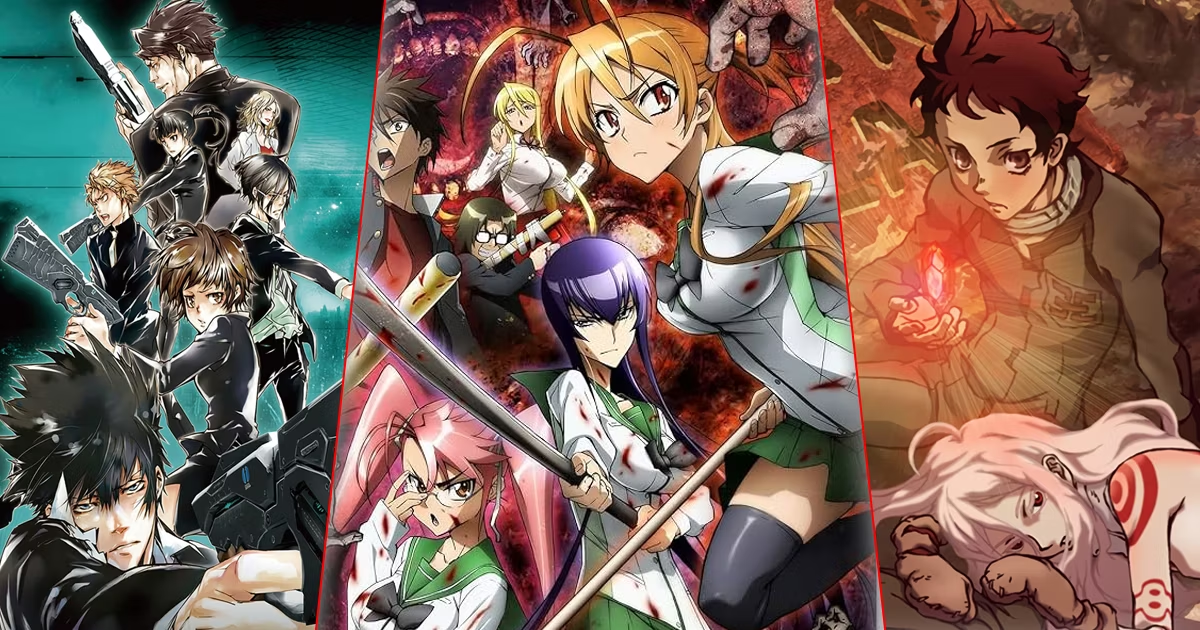

In [61]:
import pandas as pd
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/ML/Data

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/ML/Data


# **Context**
Global Anime Market size was valued at USD 26.055 billion in 2021 and is poised to grow from USD 28.61 billion in 2022 to USD 60.06 billion by 2030, growing at a CAGR of 9.8% in the forecast period (2023-2030).
The focus of this post is to give you an idea of how we can explore data using graphs and gain valuable insights from the same.
Anime Market data includes company profiles, product images and specifications, capacity, production, price, cost, revenue, and contact information.
This market produces huge amount of data everyday on which data analysis can be performed to gain a greatest insight for an individual


<br/>
<font color = "brown" size = 5> Problem Statement </font>
The data-set aims to answer the following key questions:

Does various predicting factors really affect the rating of anime?


# **DATA DICTIONARY**

 1. title :- Title of the Anime
 2. mediatype :- Type of media in which anime is relased **i.e**
                 Movie, TV Special, DVD Special, TV, Web, OVA,
                 Music Video, Other.
 3.  eps:- no. of episode in which the is produced
 4.  duration :- full length of the anime in time terms(minute)
 5.  startYr :- Year in which the production of the anime started
 6.  finishYr :- year in which the production of the anime completed
 7.  description :- Short summary about the anime
 8.  contentwarn :- warned content 18+ A rated yes no
 9.  watched :- No. of people who watched the anime
 10. watching :- No. of people who are currently watching the
 11. rating :- Rating given to the anime by the people
 12. votes :- no. of people who voted the anime
 13. studio_primary :- Studio by which the anime is produced
 14. studios_colab :- Studio colabarted to produce the anime  
 15. genre:- type of anime

In [62]:
my_df=pd.read_csv("anime_ratings_data.csv")

In [63]:
my_df.head()

title    mediaType  eps  duration  \
0  Dragon Ball Z Movie 15: Resurrection 'F'        Movie    1    67.000   
1                         Kuripuri*Kuripura        Movie    1     5.000   
2                                    GJ-bu@   TV Special    1    46.000   
3        Nausicaa of the Valley of the Wind        Movie    1    67.000   
4                       Miru Tights Special  DVD Special    1     4.000   

   startYr  finishYr                                        description  \
0     2015      2015  Even the complete obliteration of his physical...   
1     2008      2008                                                NaN   
2     2014      2014  The story is set during the spring vacation im...   
3     1984      1984  One thousand years after the Giant Warriors ca...   
4     2019      2019  Yua is asked to model an illustrator's designs...   

  contentWarn  watched  watching  rating    votes  studio_primary  \
0          No     4649        86   3.979 3100.000  Toei Animation   
1          No       10         0   2.120   10.000          Others   
2          No     1630        16   3.758 1103.000          Others   
3          No     4649       184   4.444 3100.000          Others   
4          No      346         8   2.494  234.000          Others   

  studios_colab  genre  
0            No  Other  
1            No  Other  
2            No  Other  
3            No  Drama  
4            No  Other

In [64]:
my_df=my_df.loc[:,['title', 'mediaType', 'eps', 'duration', 'startYr', 'finishYr',
       'description', 'contentWarn', 'watched', 'watching', 'votes',
       'studio_primary', 'studios_colab', 'genre', 'rating']]

In [65]:
# import necessary Libaries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [66]:
df=my_df.copy()
df.head()

title    mediaType  eps  duration  \
0  Dragon Ball Z Movie 15: Resurrection 'F'        Movie    1    67.000   
1                         Kuripuri*Kuripura        Movie    1     5.000   
2                                    GJ-bu@   TV Special    1    46.000   
3        Nausicaa of the Valley of the Wind        Movie    1    67.000   
4                       Miru Tights Special  DVD Special    1     4.000   

   startYr  finishYr                                        description  \
0     2015      2015  Even the complete obliteration of his physical...   
1     2008      2008                                                NaN   
2     2014      2014  The story is set during the spring vacation im...   
3     1984      1984  One thousand years after the Giant Warriors ca...   
4     2019      2019  Yua is asked to model an illustrator's designs...   

  contentWarn  watched  watching    votes  studio_primary studios_colab  \
0          No     4649        86 3100.000  Toei Animation            No   
1          No       10         0   10.000          Others            No   
2          No     1630        16 1103.000          Others            No   
3          No     4649       184 3100.000          Others            No   
4          No      346         8  234.000          Others            No   

   genre  rating  
0  Other   3.979  
1  Other   2.120  
2  Other   3.758  
3  Drama   4.444  
4  Other   2.494

In [67]:
df.shape

(6523, 15)

In [68]:
df.columns

Index(['title', 'mediaType', 'eps', 'duration', 'startYr', 'finishYr',
       'description', 'contentWarn', 'watched', 'watching', 'votes',
       'studio_primary', 'studios_colab', 'genre', 'rating'],
      dtype='object')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6523 non-null   object 
 1   mediaType       6496 non-null   object 
 2   eps             6523 non-null   int64  
 3   duration        6248 non-null   float64
 4   startYr         6523 non-null   int64  
 5   finishYr        6523 non-null   int64  
 6   description     4114 non-null   object 
 7   contentWarn     6523 non-null   object 
 8   watched         6523 non-null   int64  
 9   watching        6523 non-null   int64  
 10  votes           6496 non-null   float64
 11  studio_primary  6523 non-null   object 
 12  studios_colab   6523 non-null   object 
 13  genre           6523 non-null   object 
 14  rating          6523 non-null   float64
dtypes: float64(3), int64(5), object(7)
memory usage: 764.5+ KB


In [70]:
df.isnull().sum()

title                0
mediaType           27
eps                  0
duration           275
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
votes               27
studio_primary       0
studios_colab        0
genre                0
rating               0
dtype: int64

# **Dropping the columns which are not required**

In [71]:
df=df.drop(columns=["title","description"],axis=1)

# **Working on the null values**

In [72]:
# duration column
df["duration"].isnull().sum()
#Filling the null values
df["duration"]=df["duration"].fillna((df['duration'].median()))

In [73]:
# MediaType column
df["mediaType"].isnull().sum()
#filling the Null values
df["mediaType"]=df["mediaType"].fillna('TV')


In [74]:
# votes column
df["votes"].isnull().sum()
#filling the Null values
df["votes"]=df["votes"].fillna((df["votes"].median()))

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mediaType       6523 non-null   object 
 1   eps             6523 non-null   int64  
 2   duration        6523 non-null   float64
 3   startYr         6523 non-null   int64  
 4   finishYr        6523 non-null   int64  
 5   contentWarn     6523 non-null   object 
 6   watched         6523 non-null   int64  
 7   watching        6523 non-null   int64  
 8   votes           6523 non-null   float64
 9   studio_primary  6523 non-null   object 
 10  studios_colab   6523 non-null   object 
 11  genre           6523 non-null   object 
 12  rating          6523 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 662.6+ KB


In [76]:
df.isnull().sum()

mediaType         0
eps               0
duration          0
startYr           0
finishYr          0
contentWarn       0
watched           0
watching          0
votes             0
studio_primary    0
studios_colab     0
genre             0
rating            0
dtype: int64

In [77]:
pd.set_option('display.float_format',lambda x: "%.3f" % x)
df.describe(include="all").T

count unique     top  freq     mean      std      min  \
mediaType          6523      8      TV  2172      NaN      NaN      NaN   
eps            6523.000    NaN     NaN   NaN    8.716   11.002    1.000   
duration       6523.000    NaN     NaN   NaN   17.916   20.630    1.000   
startYr        6523.000    NaN     NaN   NaN 2005.241   12.911 1967.000   
finishYr       6523.000    NaN     NaN   NaN 2005.575   12.568 1970.000   
contentWarn        6523      2      No  5825      NaN      NaN      NaN   
watched        6523.000    NaN     NaN   NaN 1347.949 1737.138    5.000   
watching       6523.000    NaN     NaN   NaN   57.446   76.527    0.000   
votes          6523.000    NaN     NaN   NaN  903.444 1170.062   10.000   
studio_primary     6523     11  Others  4684      NaN      NaN      NaN   
studios_colab      6523      2      No  6210      NaN      NaN      NaN   
genre              6523      9   Other  5468      NaN      NaN      NaN   
rating         6523.000    NaN     NaN   NaN    2.963    0.760    1.111   

                    25%      50%      75%      max  
mediaType           NaN      NaN      NaN      NaN  
eps               1.000    1.000   12.000   34.000  
duration          5.000    7.000   25.000   67.000  
startYr        2000.000 2010.000 2015.000 2020.000  
finishYr       2000.000 2010.000 2015.000 2020.000  
contentWarn         NaN      NaN      NaN      NaN  
watched          56.000  349.000 2252.500 4649.000  
watching          2.000   13.000   98.000  199.000  
votes            35.000  227.500 1544.000 3100.000  
studio_primary      NaN      NaN      NaN      NaN  
studios_colab       NaN      NaN      NaN      NaN  
genre               NaN      NaN      NaN      NaN  
rating            2.371    2.944    3.568    4.702

# **OBSERVATION**
1. Average rating 2.963
2. content warn has 2 unique value yes no


In [78]:
df.describe(include="object").T

count unique     top  freq
mediaType       6523      8      TV  2172
contentWarn     6523      2      No  5825
studio_primary  6523     11  Others  4684
studios_colab   6523      2      No  6210
genre           6523      9   Other  5468

In [79]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red',orient='h') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=True, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

# **Univariate Plot**

0.46574160912853374

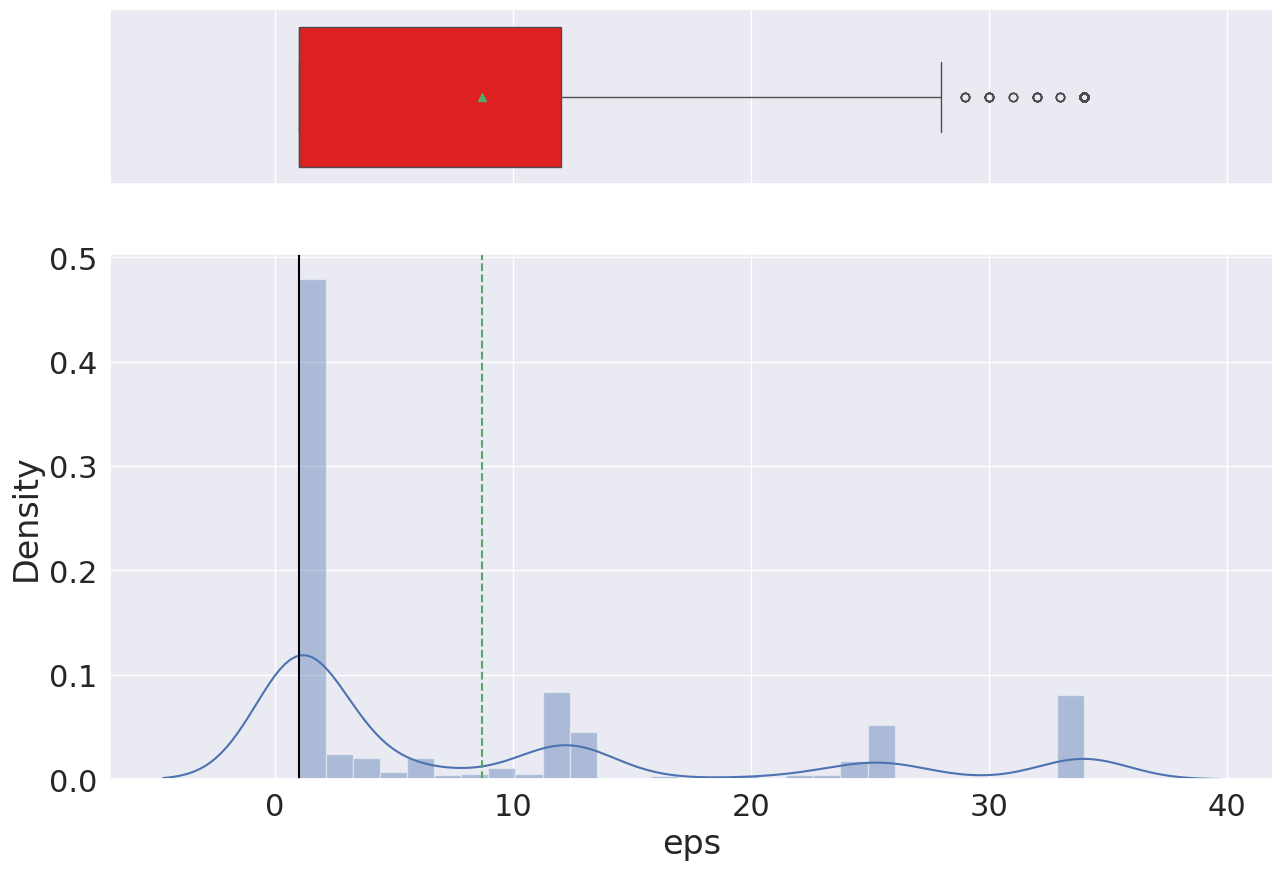

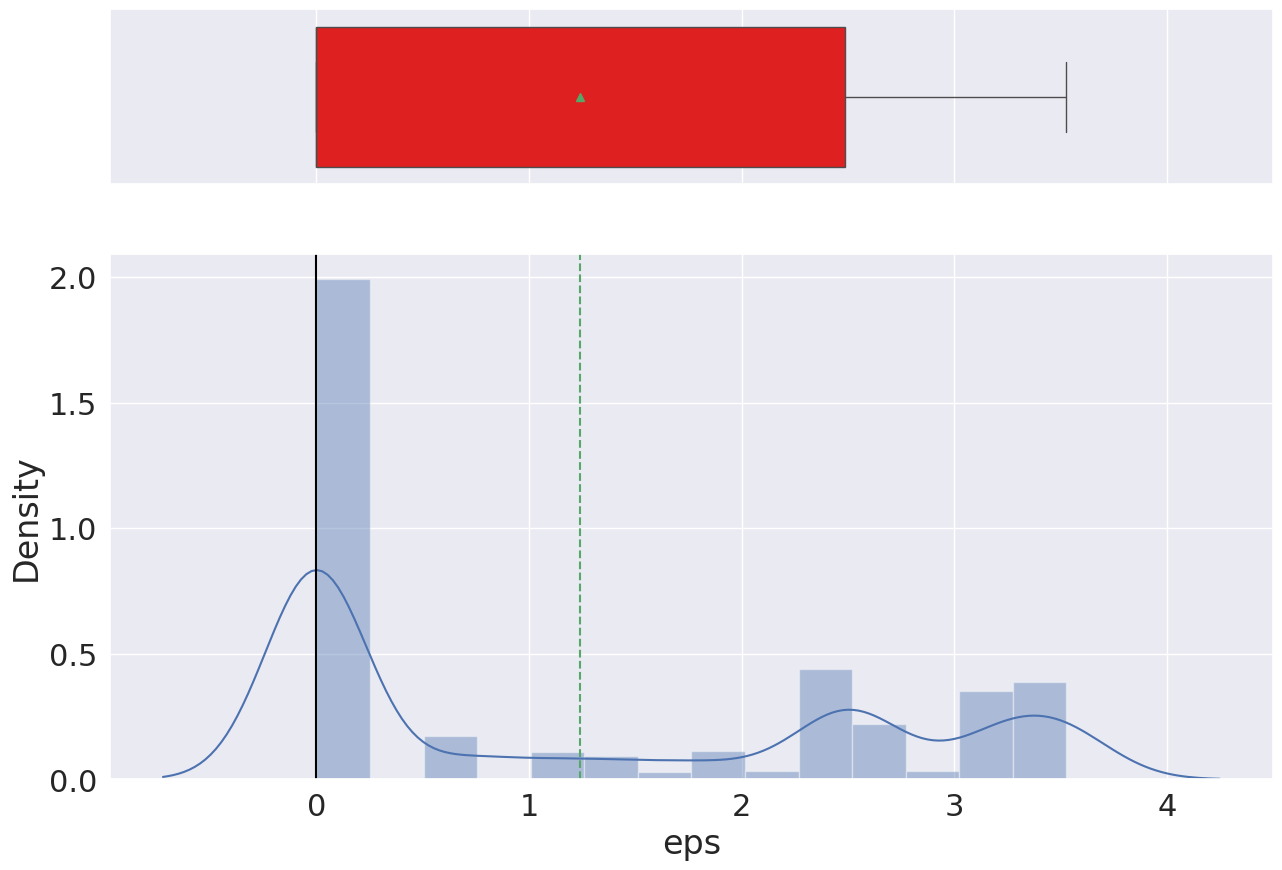

In [80]:
#eps
histogram_boxplot(df["eps"])
df['eps'].skew()
histogram_boxplot(np.log(df["eps"]))
df["eps_norm"]=np.log(df["eps"])
df["eps_norm"].skew()

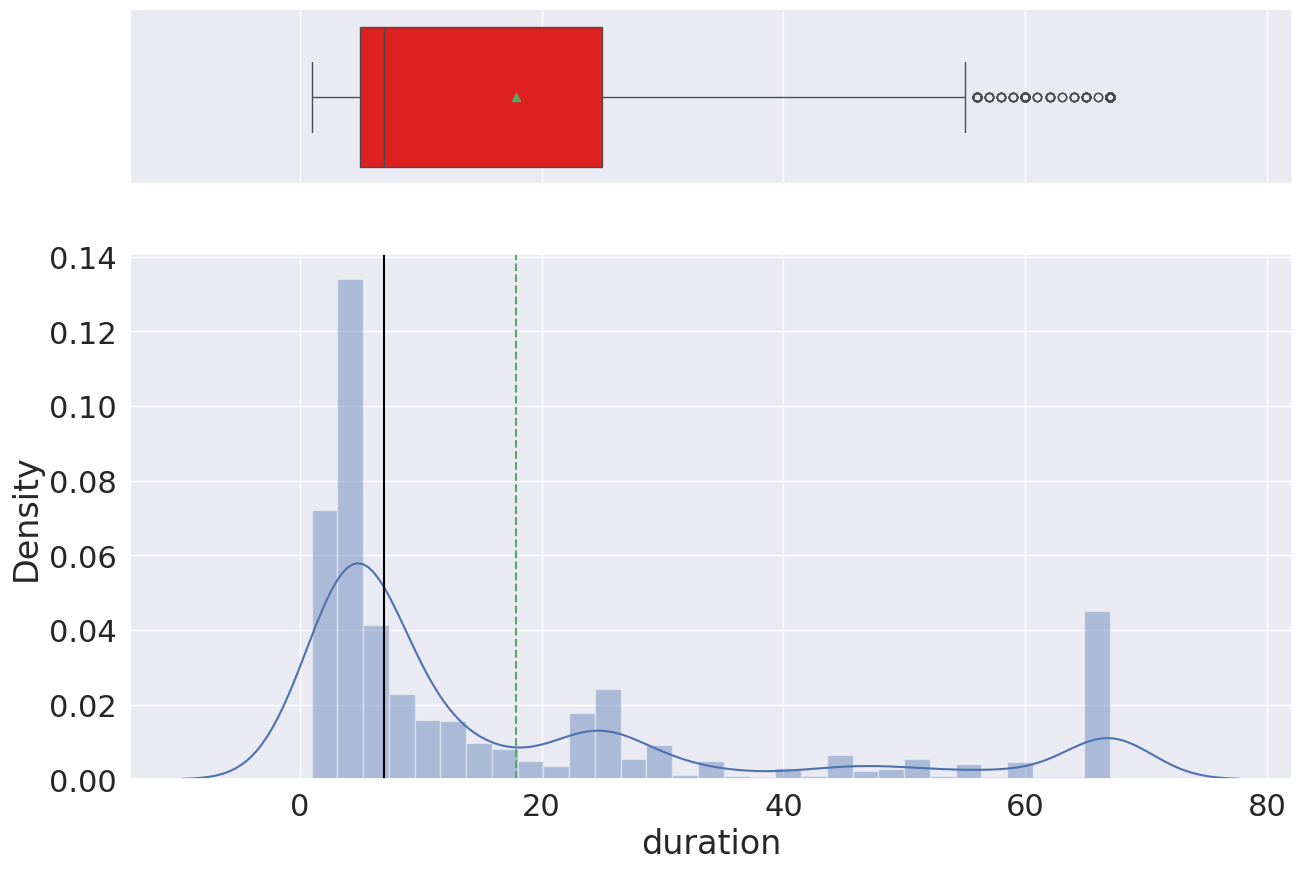

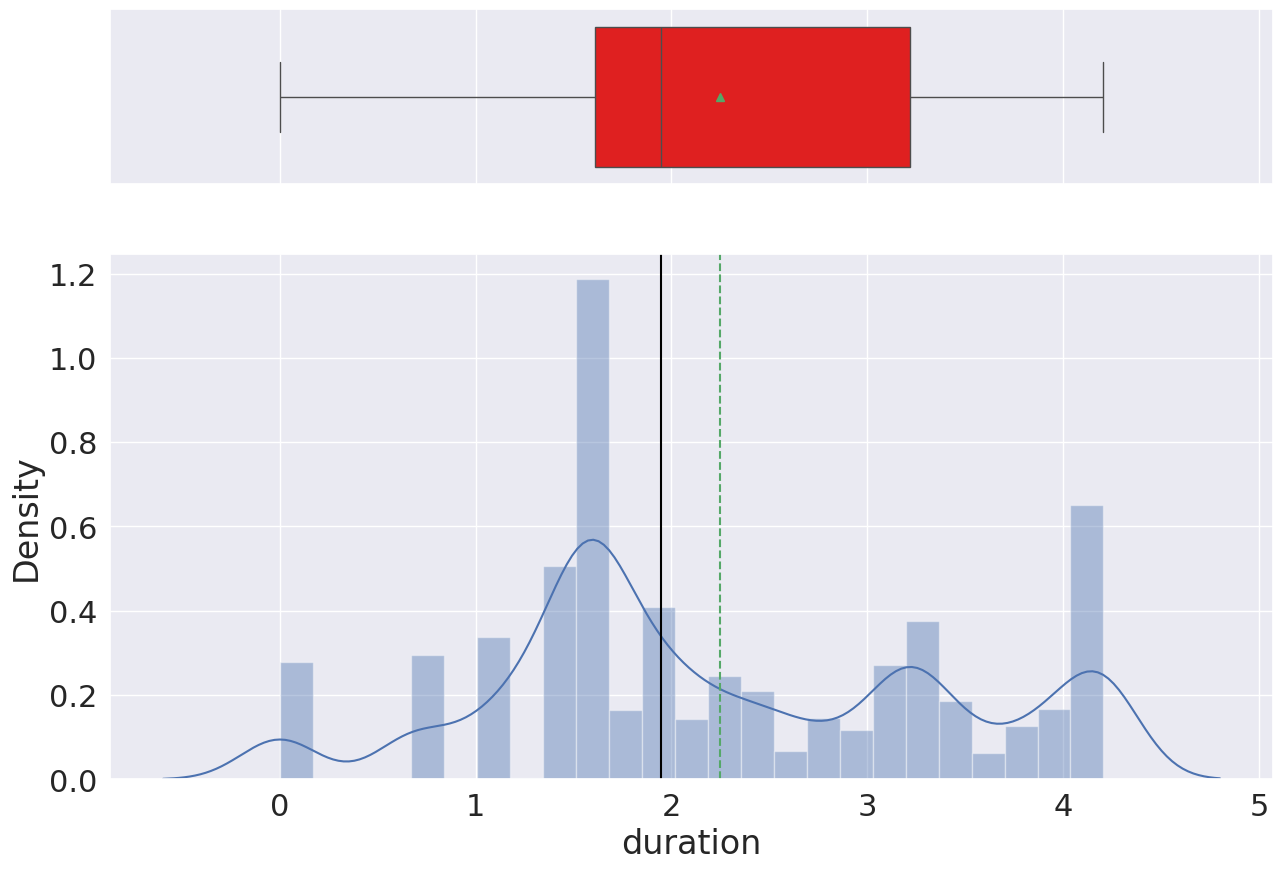

In [81]:
#duration
histogram_boxplot(df["duration"])
df["duration"].skew()
df["duration_norm"]=np.log(df["duration"])
histogram_boxplot(np.log(df["duration"]))
#log transformation is pursed on duration to make skewness value close to zero

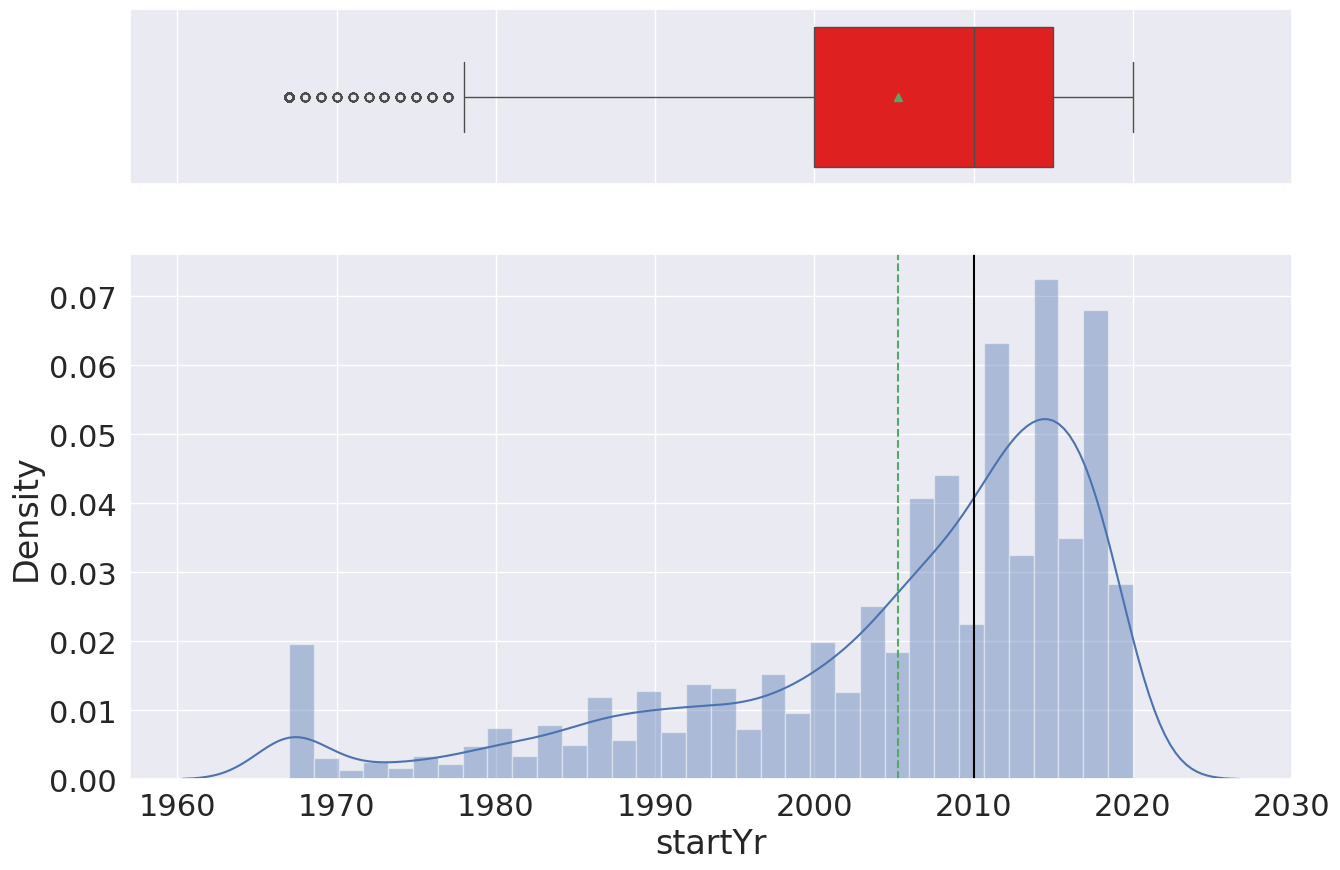

In [82]:
histogram_boxplot(df["startYr"])
#no feature engineering can be pursued as skewness value tends to remain same or near close to older value

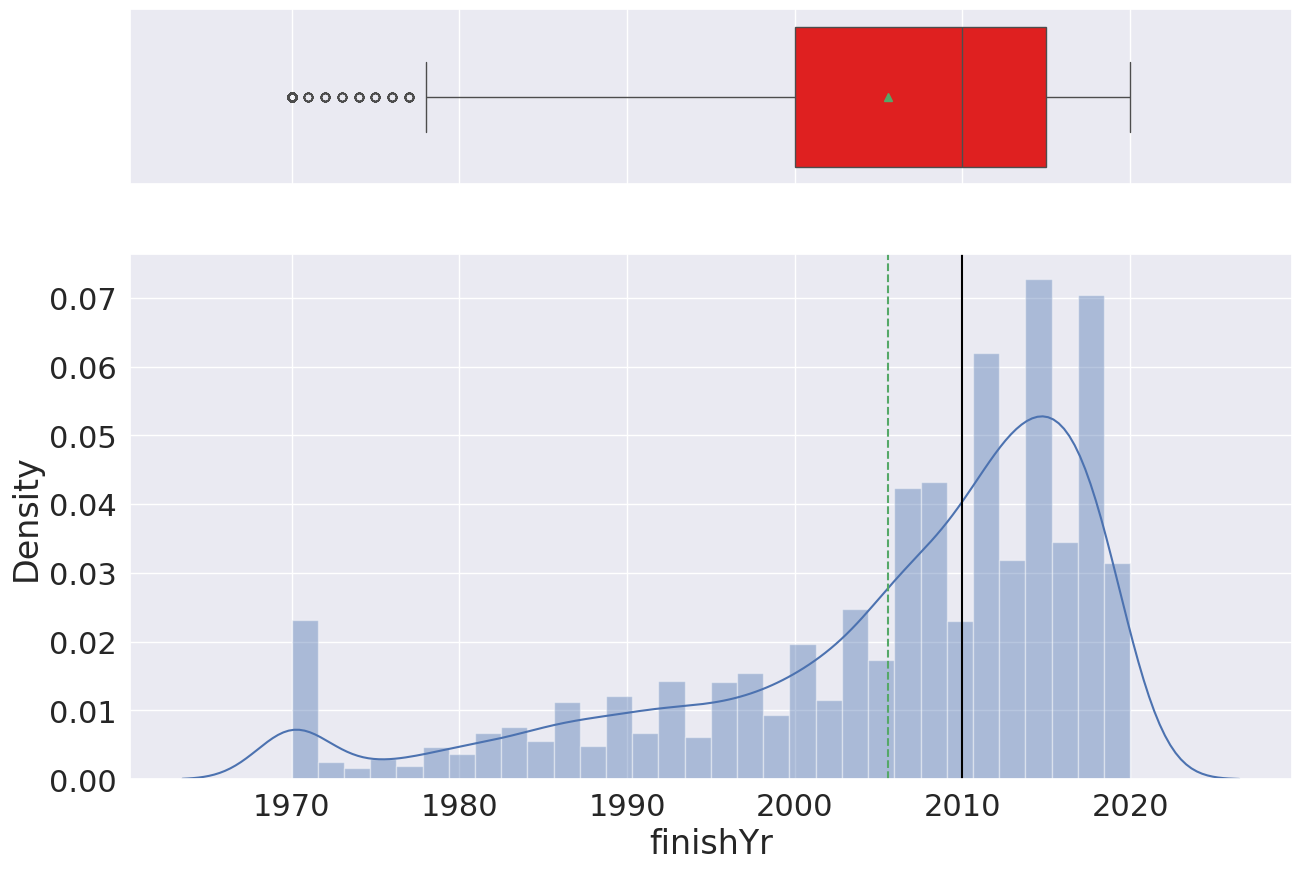

In [83]:
histogram_boxplot(df["finishYr"])
#no feature engineering can be pursued as skewness value tends to remain same or near close to older value

-0.0437656430054254

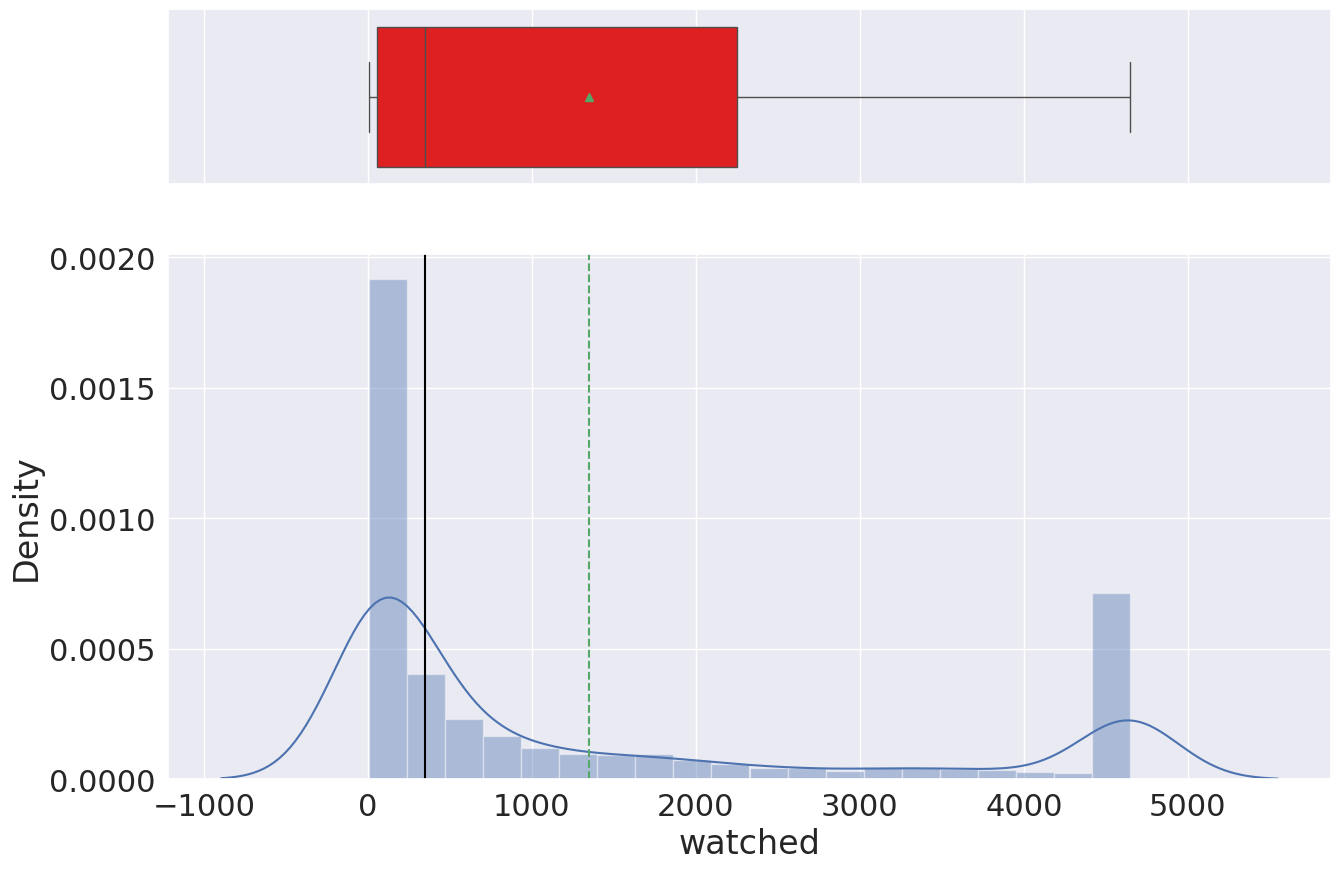

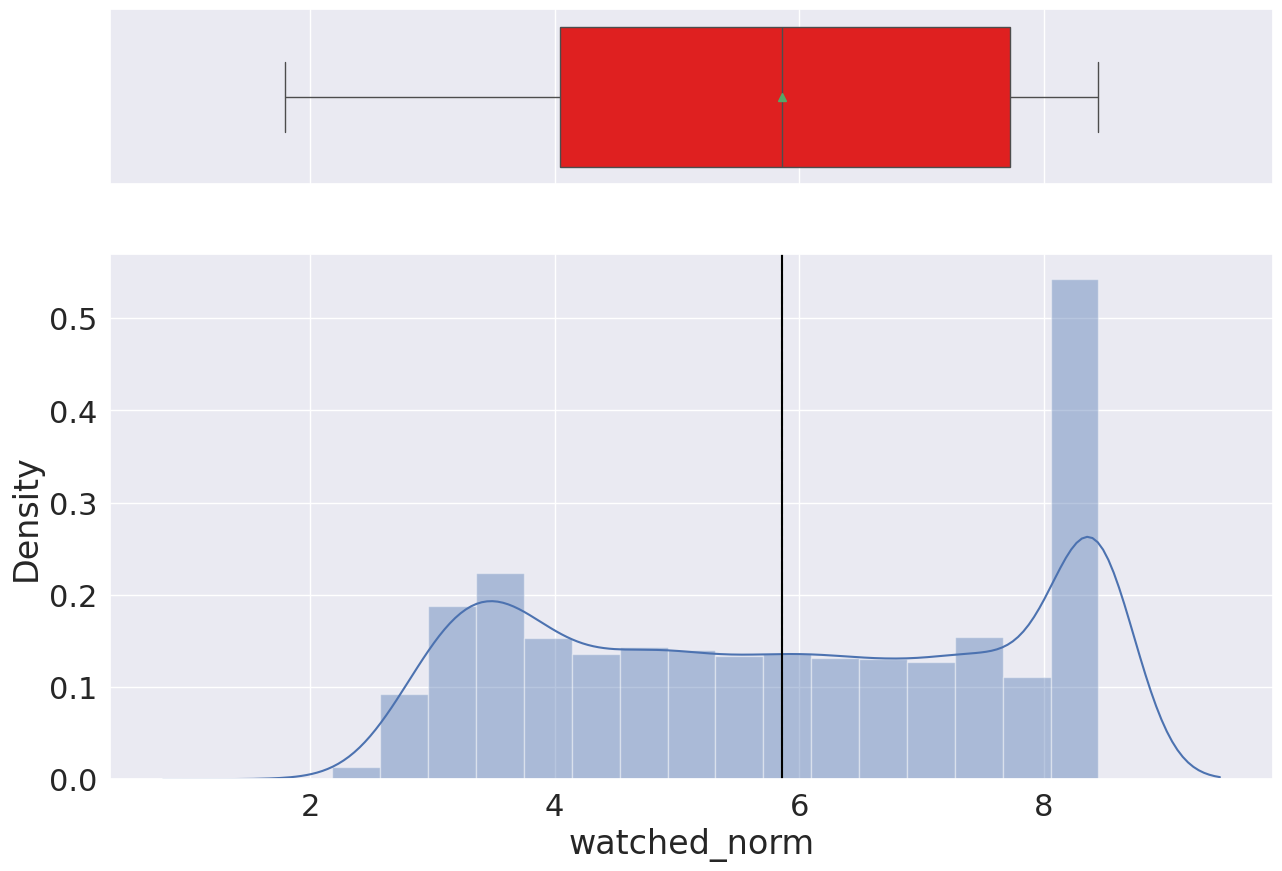

In [84]:
# watched
histogram_boxplot(df["watched"])
df['watched_norm']=np.log1p(df["watched"])
histogram_boxplot(df["watched_norm"])
df["watched_norm"].skew()
# log1p transformation is done to procure the skewness value near zero

0.017853232721205644

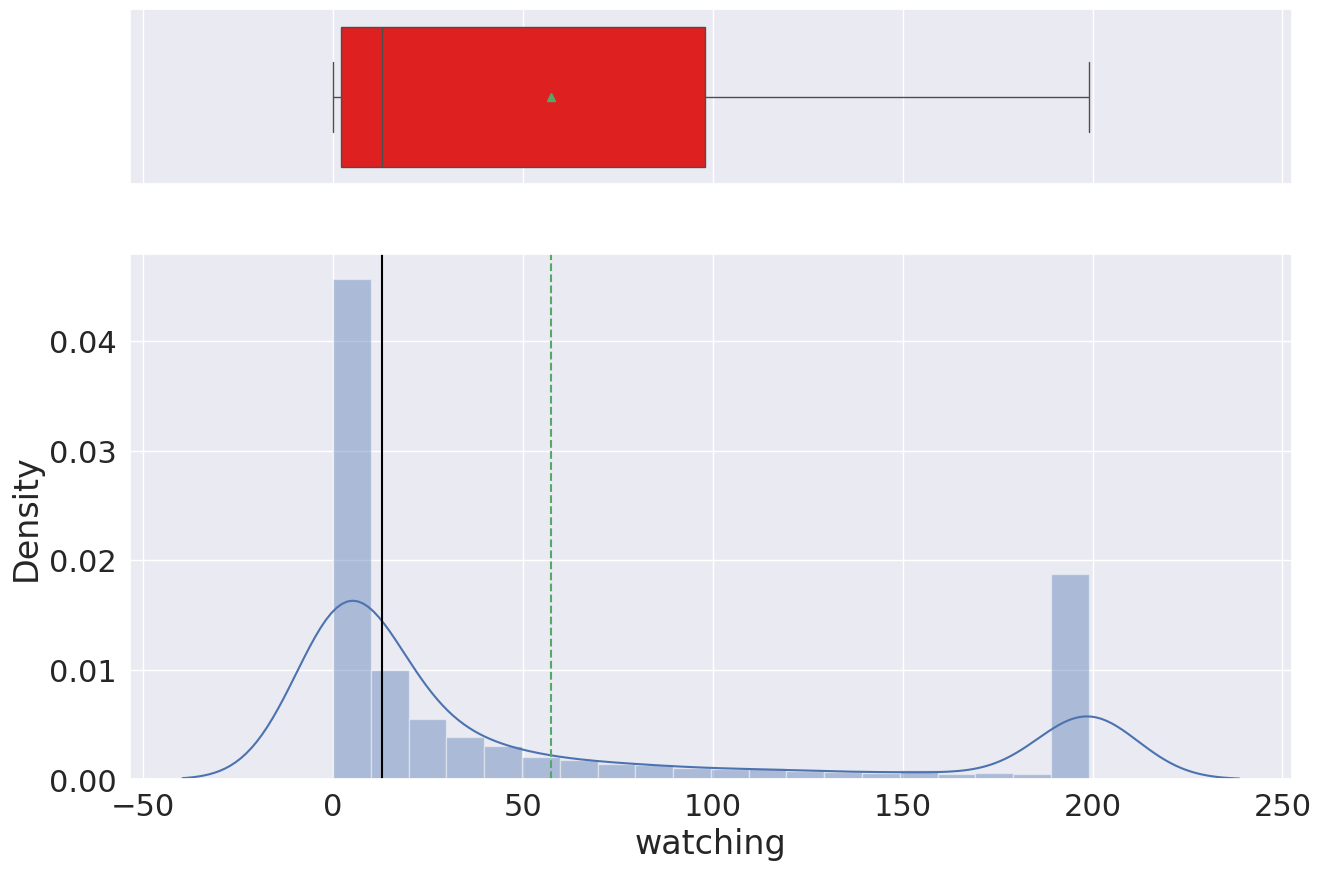

In [85]:
histogram_boxplot(df["watching"])
df["watching"].skew()
df["watching_norm"]=np.log1p(df["watching"])
df["watching_norm"].skew()

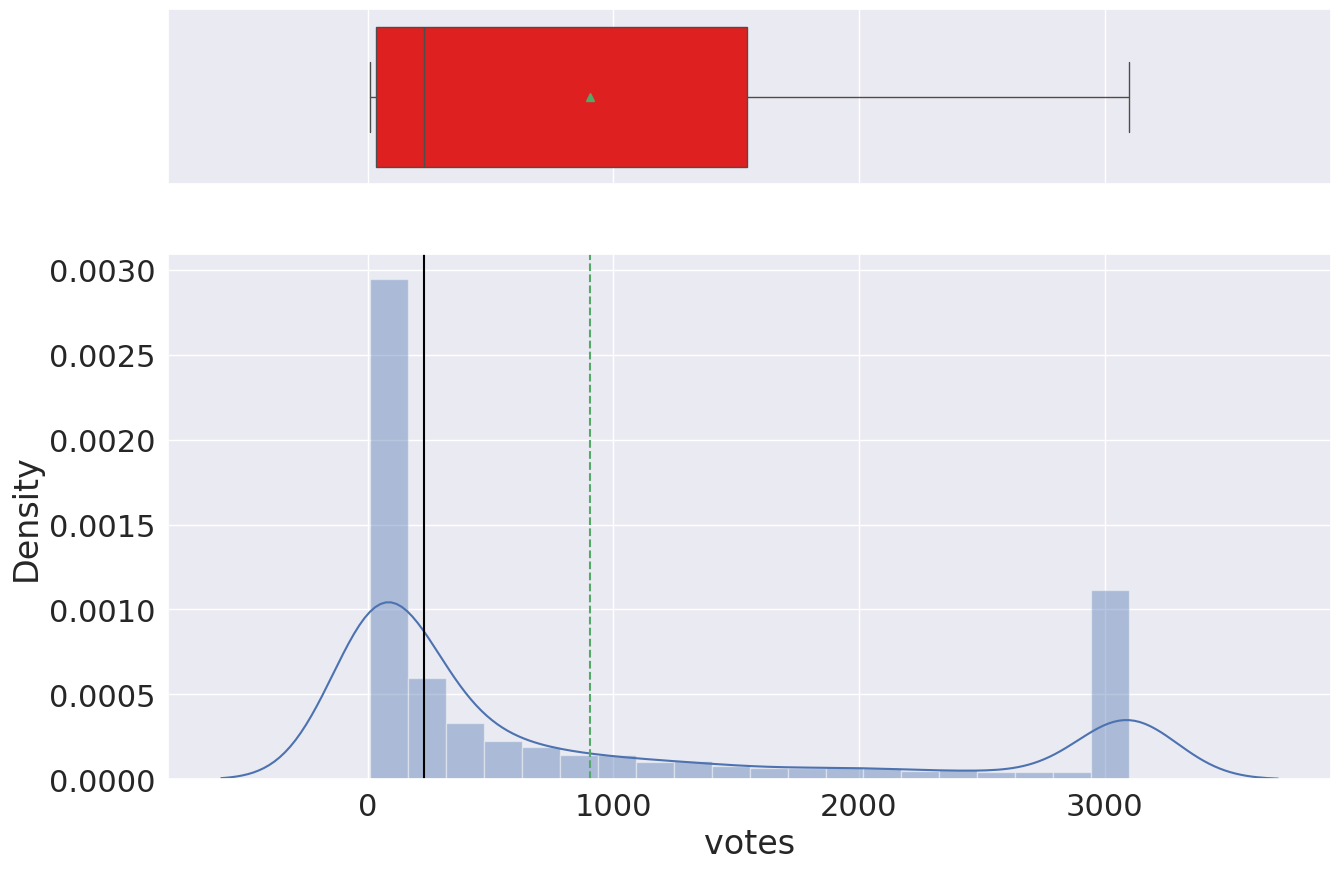

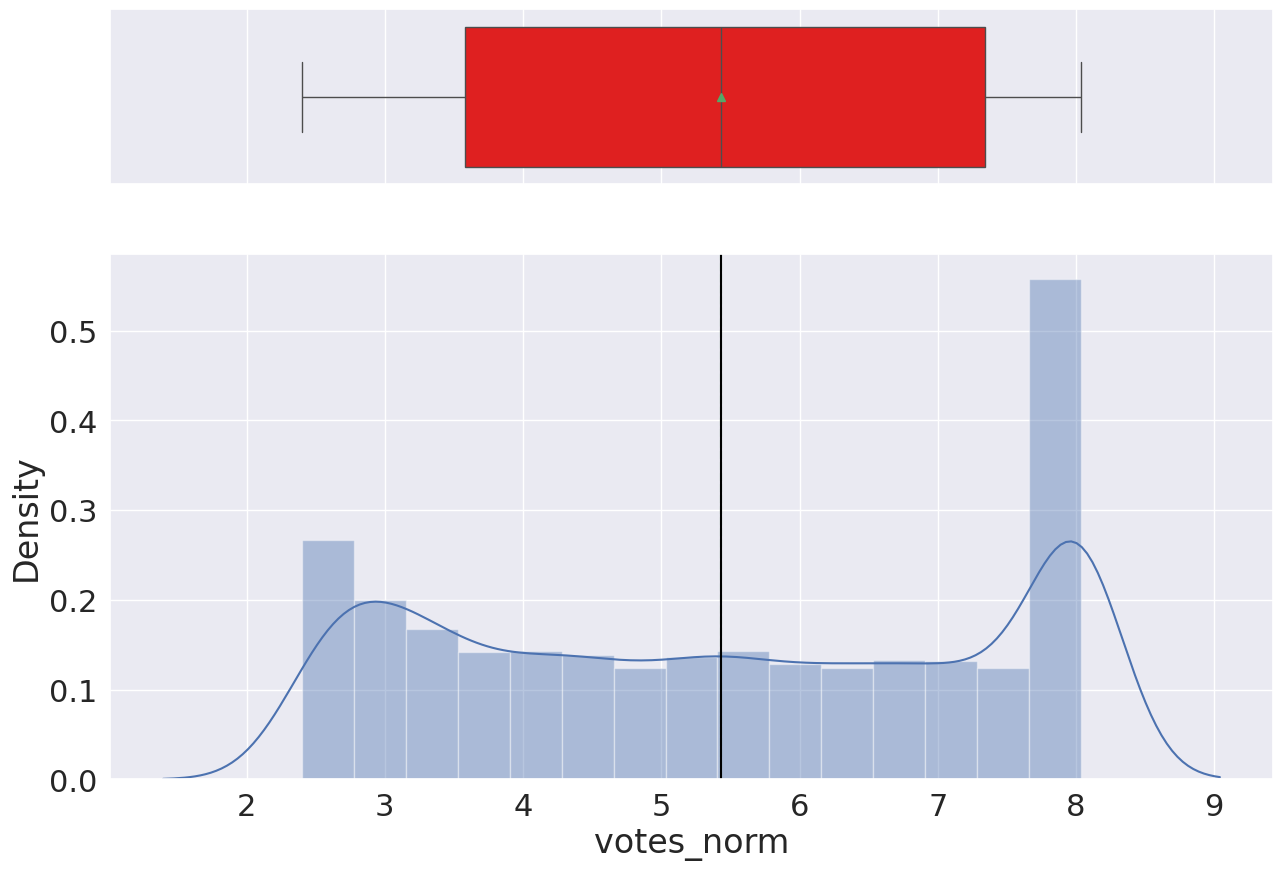

In [86]:
#votes
histogram_boxplot(df["votes"])
df['votes'].skew()
df['votes_norm']=np.log1p(df['votes'])
df["votes_norm"].skew()
histogram_boxplot((df["votes_norm"]))
# log1p tarnsformation is applied on the columns to procure skewness value near zero or close to zero so that the data should distributed symmetrically

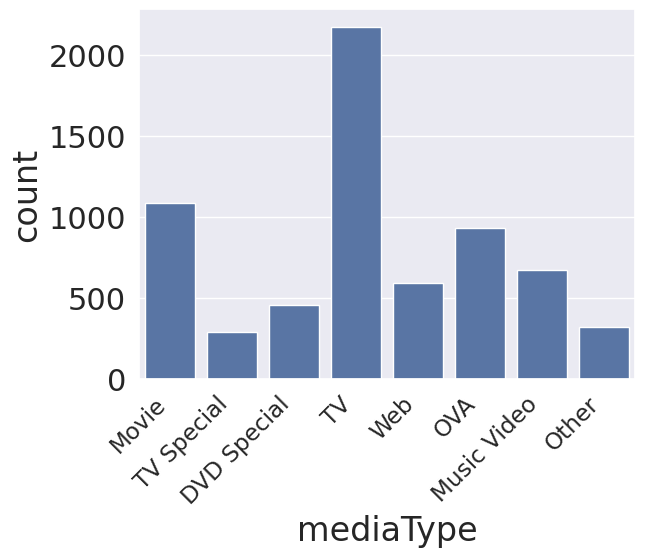

In [87]:
plot = sns.countplot(df, x='mediaType')

# Get x-axis tick locations and labels
xtick_loc = plot.get_xticks()
xtick_labels = plot.get_xticklabels()

# Set the x-axis ticks
plot.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize='x-small')

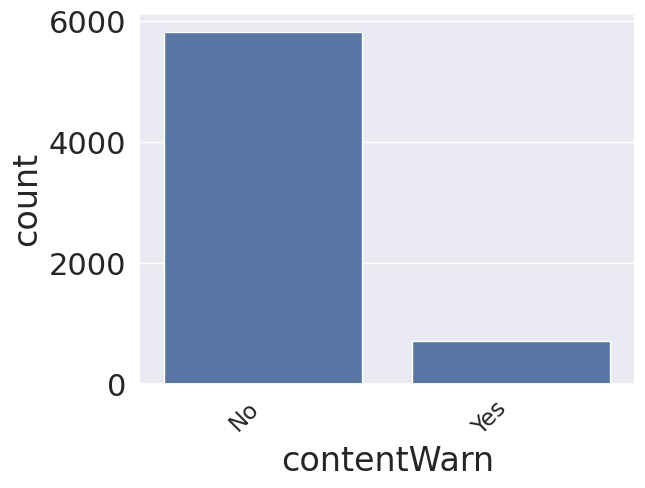

In [88]:
plot = sns.countplot(df, x='contentWarn')

# Get x-axis tick locations and labels
xtick_loc = plot.get_xticks()
xtick_labels = plot.get_xticklabels()

# Set the x-axis ticks
plot.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize='x-small')

[Text(0, 0, 'Other'),
 Text(1, 0, 'Drama'),
 Text(2, 0, 'Adventure'),
 Text(3, 0, 'Sci Fi'),
 Text(4, 0, 'Comedy'),
 Text(5, 0, 'Based on a Manga'),
 Text(6, 0, 'Action'),
 Text(7, 0, 'Romance'),
 Text(8, 0, 'Fantasy')]

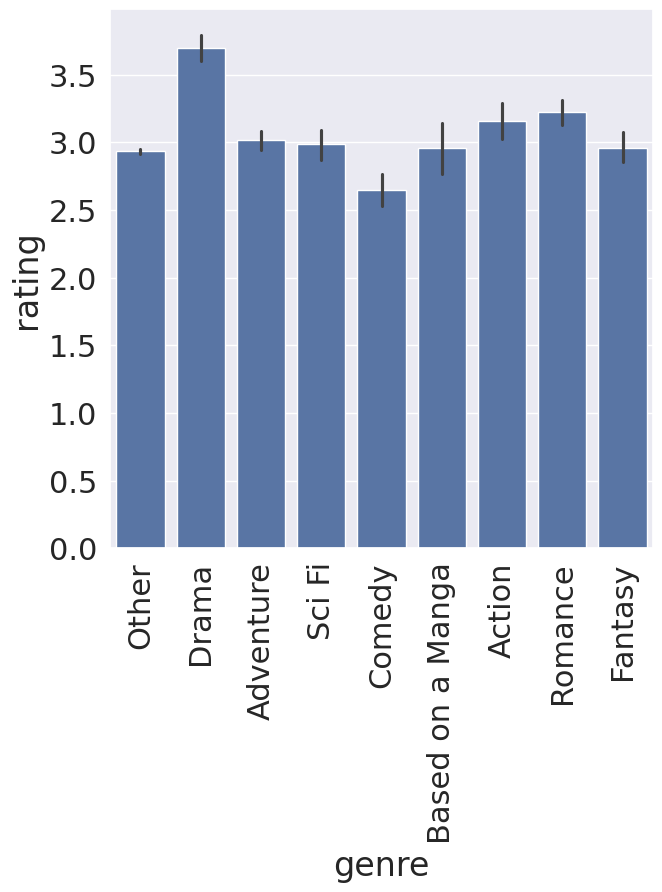

In [89]:
# rating vs genre
plt.figure(figsize=(7,7))
se=sns.barplot(x="genre",y="rating",data=df)
se.set_xticklabels(df["genre"].unique(),rotation=90)

# Observation:-
1.Max rating is given to "darma" genre.

2.Followed by "Romance" genre 2nd mostly rated.

3.3rd most rated "Action" genre

4.least rating is given to comedy

[Text(0, 0, 'Other'),
 Text(1, 0, 'Drama'),
 Text(2, 0, 'Adventure'),
 Text(3, 0, 'Sci Fi'),
 Text(4, 0, 'Comedy'),
 Text(5, 0, 'Based on a Manga'),
 Text(6, 0, 'Action'),
 Text(7, 0, 'Romance'),
 Text(8, 0, 'Fantasy'),
 Text(9, 0, ''),
 Text(10, 0, '')]

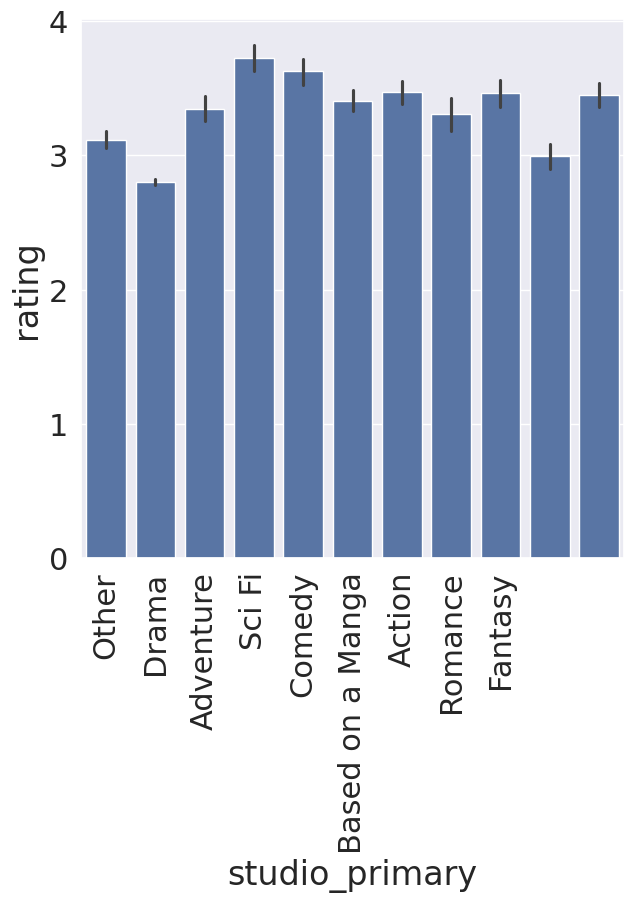

In [90]:
# rating vs studio_primary
plt.figure(figsize=(7,7))
se=sns.barplot(x="studio_primary",y="rating",data=df)
se.set_xticklabels(df["genre"].unique(),rotation=90)

[Text(0, 0, 'Movie'),
 Text(1, 0, 'TV Special'),
 Text(2, 0, 'DVD Special'),
 Text(3, 0, 'TV'),
 Text(4, 0, 'Web'),
 Text(5, 0, 'OVA'),
 Text(6, 0, 'Music Video'),
 Text(7, 0, 'Other')]

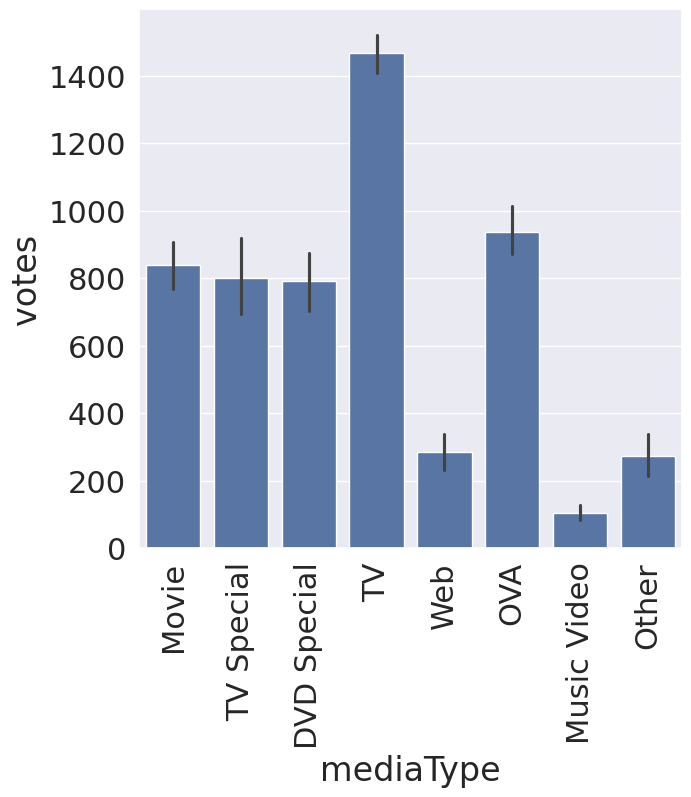

In [91]:
# votes vs mediaType
plt.figure(figsize=(7,7))
se=sns.barplot(x="mediaType",y="votes",data=df)
se.set_xticklabels(df["mediaType"].unique(),rotation=90)

# Observation:-
1. Most voted mediaType by people is TV with around 1400 votes

2. Followed by original vedio animation(OVA) with around 950 votes

3. 3rd most voted or used mediaType by people is Movie to Watch anime

4. with this graph it is observed that very low people like to watch anime music vedio

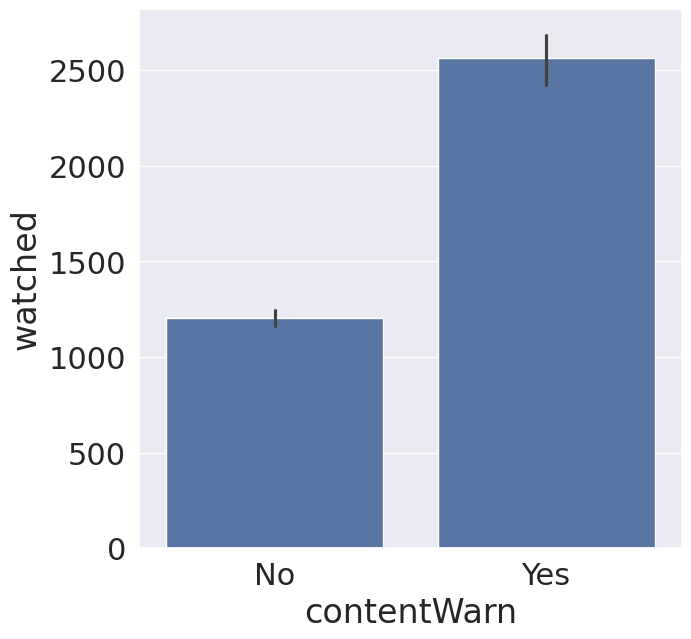

In [92]:
# Watched vs contentWarn
plt.figure(figsize=(7,7))
se=sns.barplot(x="contentWarn",y="watched",data=df)

# Observation:-
people loved to watched A rated anime, its watched counts with contentWarn votes "yes" tends to fall 2500 which is almost mor than half of the people who are not consuming A rated anime.


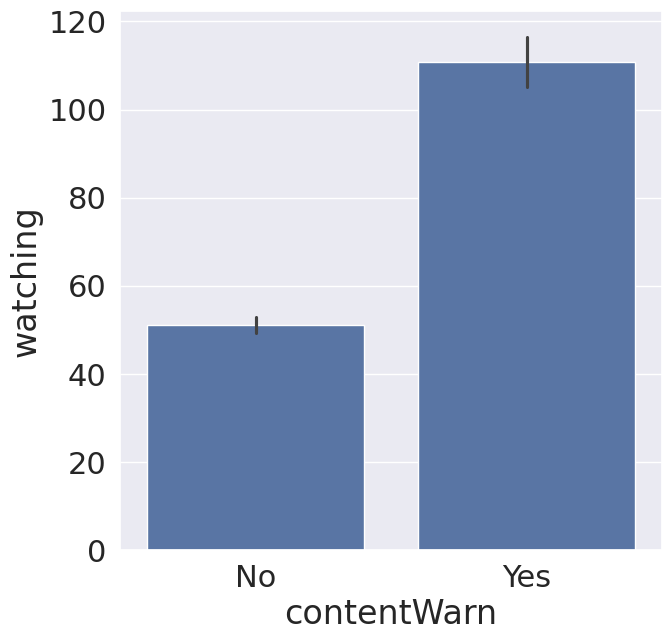

In [93]:
# watching vs contentWarn
plt.figure(figsize=(7,7))
se=sns.barplot(x="contentWarn",y="watching",data=df)

# Observation:-
In Current watching status people are consuming more warned content or A rated Anime contet

# **Multivariate** **Plot**

In [94]:
df.columns

Index(['mediaType', 'eps', 'duration', 'startYr', 'finishYr', 'contentWarn',
       'watched', 'watching', 'votes', 'studio_primary', 'studios_colab',
       'genre', 'rating', 'eps_norm', 'duration_norm', 'watched_norm',
       'watching_norm', 'votes_norm'],
      dtype='object')

[Text(0, 0, 'Toei Animation'),
 Text(1, 0, 'Others'),
 Text(2, 0, 'J.C. Staff'),
 Text(3, 0, 'A-1 Pictures'),
 Text(4, 0, 'Production I.G'),
 Text(5, 0, 'Sunrise'),
 Text(6, 0, 'TMS Entertainment'),
 Text(7, 0, 'Studio Pierrot'),
 Text(8, 0, 'Studio Deen'),
 Text(9, 0, 'OLM'),
 Text(10, 0, 'MADHOUSE')]

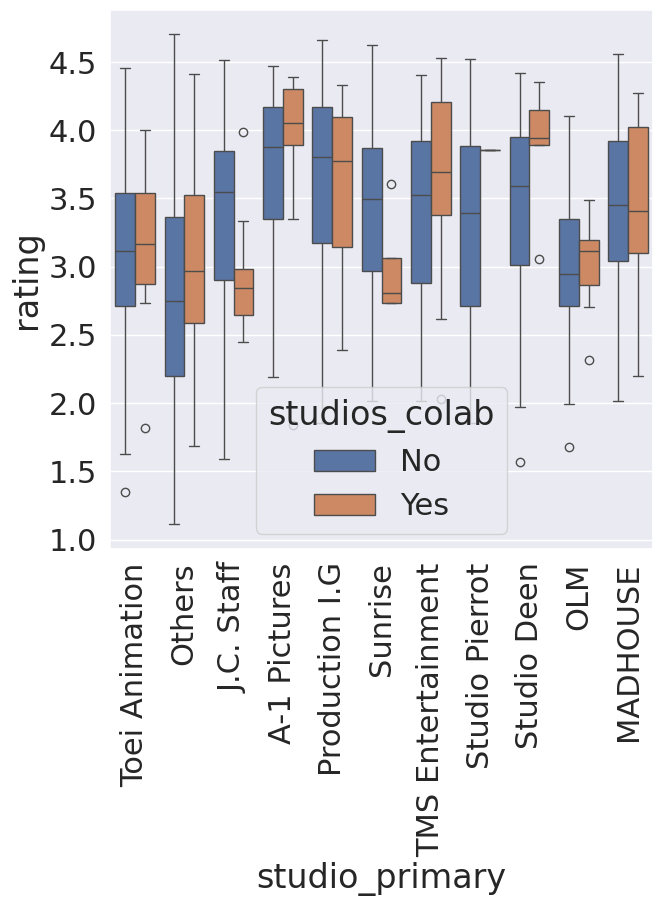

In [95]:
#studio_primary and rating
plt.figure(figsize=(7,7))
se=sns.boxplot(y="rating",x="studio_primary",hue="studios_colab",data=df)
se.set_xticklabels(df["studio_primary"].unique(),rotation=90)

[Text(0, 0, 'Other'),
 Text(1, 0, 'Drama'),
 Text(2, 0, 'Adventure'),
 Text(3, 0, 'Sci Fi'),
 Text(4, 0, 'Comedy'),
 Text(5, 0, 'Based on a Manga'),
 Text(6, 0, 'Action'),
 Text(7, 0, 'Romance'),
 Text(8, 0, 'Fantasy')]

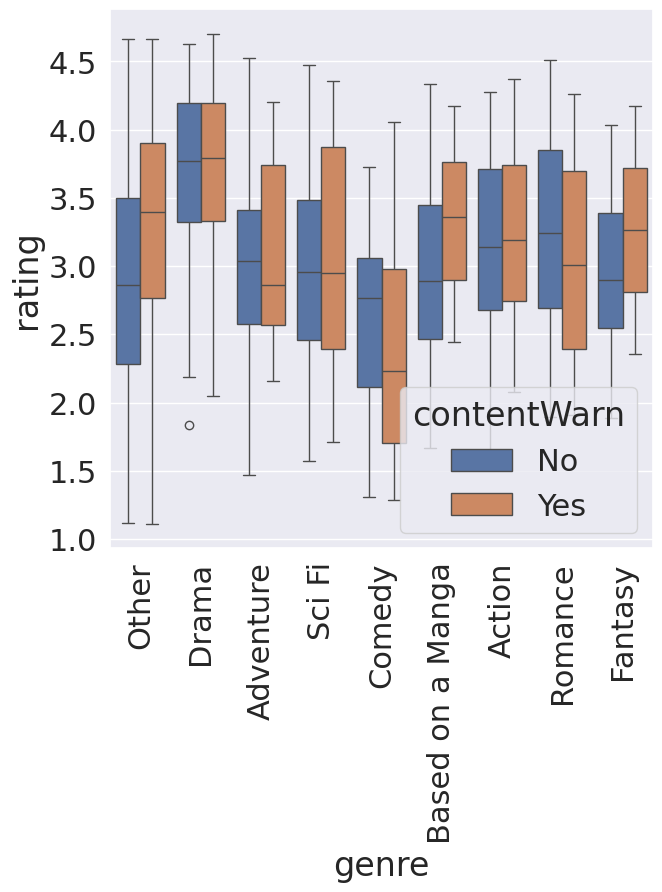

In [96]:
#genre and rating
plt.figure(figsize=(7,7))
se=sns.boxplot(y="rating",x="genre",hue="contentWarn",data=df)
se.set_xticklabels(df["genre"].unique(),rotation=90)

# Observation:-
Darma genre with warned content is rated more, with around 4.5 rating and above

Followed by romance genre with around 4.5 rating but with low warned content..

But scifi is the only category which is greatly enjoyed in warned content with rating as good 3.0 and above

<Axes: xlabel='watched', ylabel='rating'>

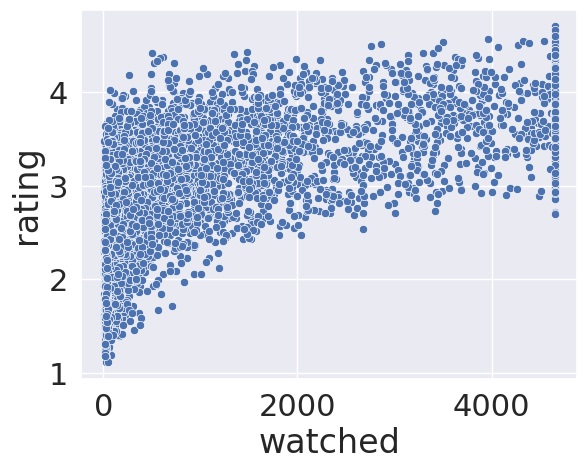

In [97]:
# watched vs Ratings
sns.scatterplot(y='rating',x ='watched',  data = df)

# Observation:-
 As the no. of watched increase the rating also tends to increase


<Axes: xlabel='eps', ylabel='rating'>

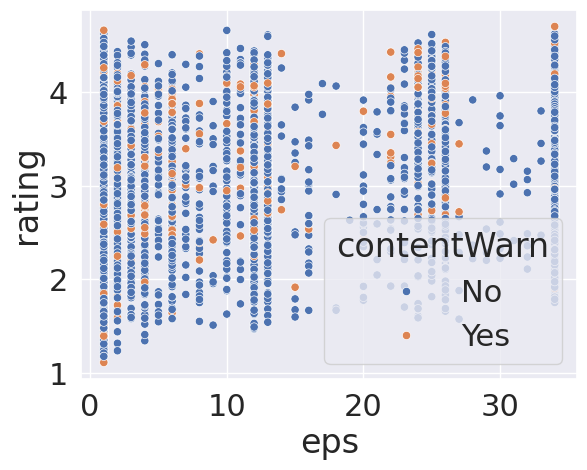

In [98]:
# Episodes vs Ratings
sns.scatterplot(y='rating',x ='eps',  data = df, hue = 'contentWarn')

# Observation:-
 no such observation can be made with this graph

In [99]:
# Duration vs Ratings
sns.scatterplot(y='rating',x ='duration',  data = df, hue = 'contentWarn')

<Axes: xlabel='duration', ylabel='rating'>

### Observations:
- It is clearly seen that the worst ratings (below 1.5)  are observed in the anime where the duration is less than 20 minutes



<Axes: xlabel='votes', ylabel='rating'>

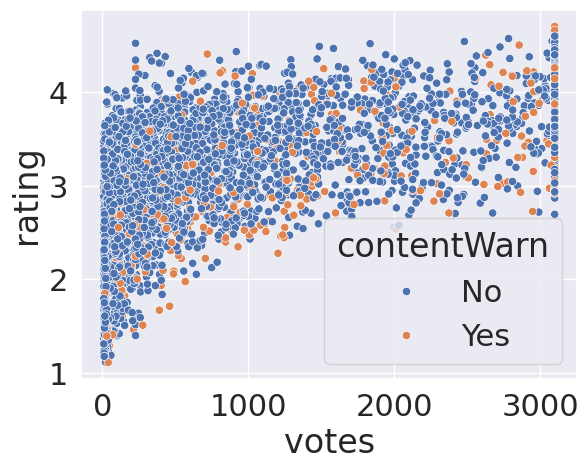

In [100]:
#votes vs rating
sns.scatterplot(y='rating',x ='votes',  data = df,hue = 'contentWarn')

# **checking the normality of columns**

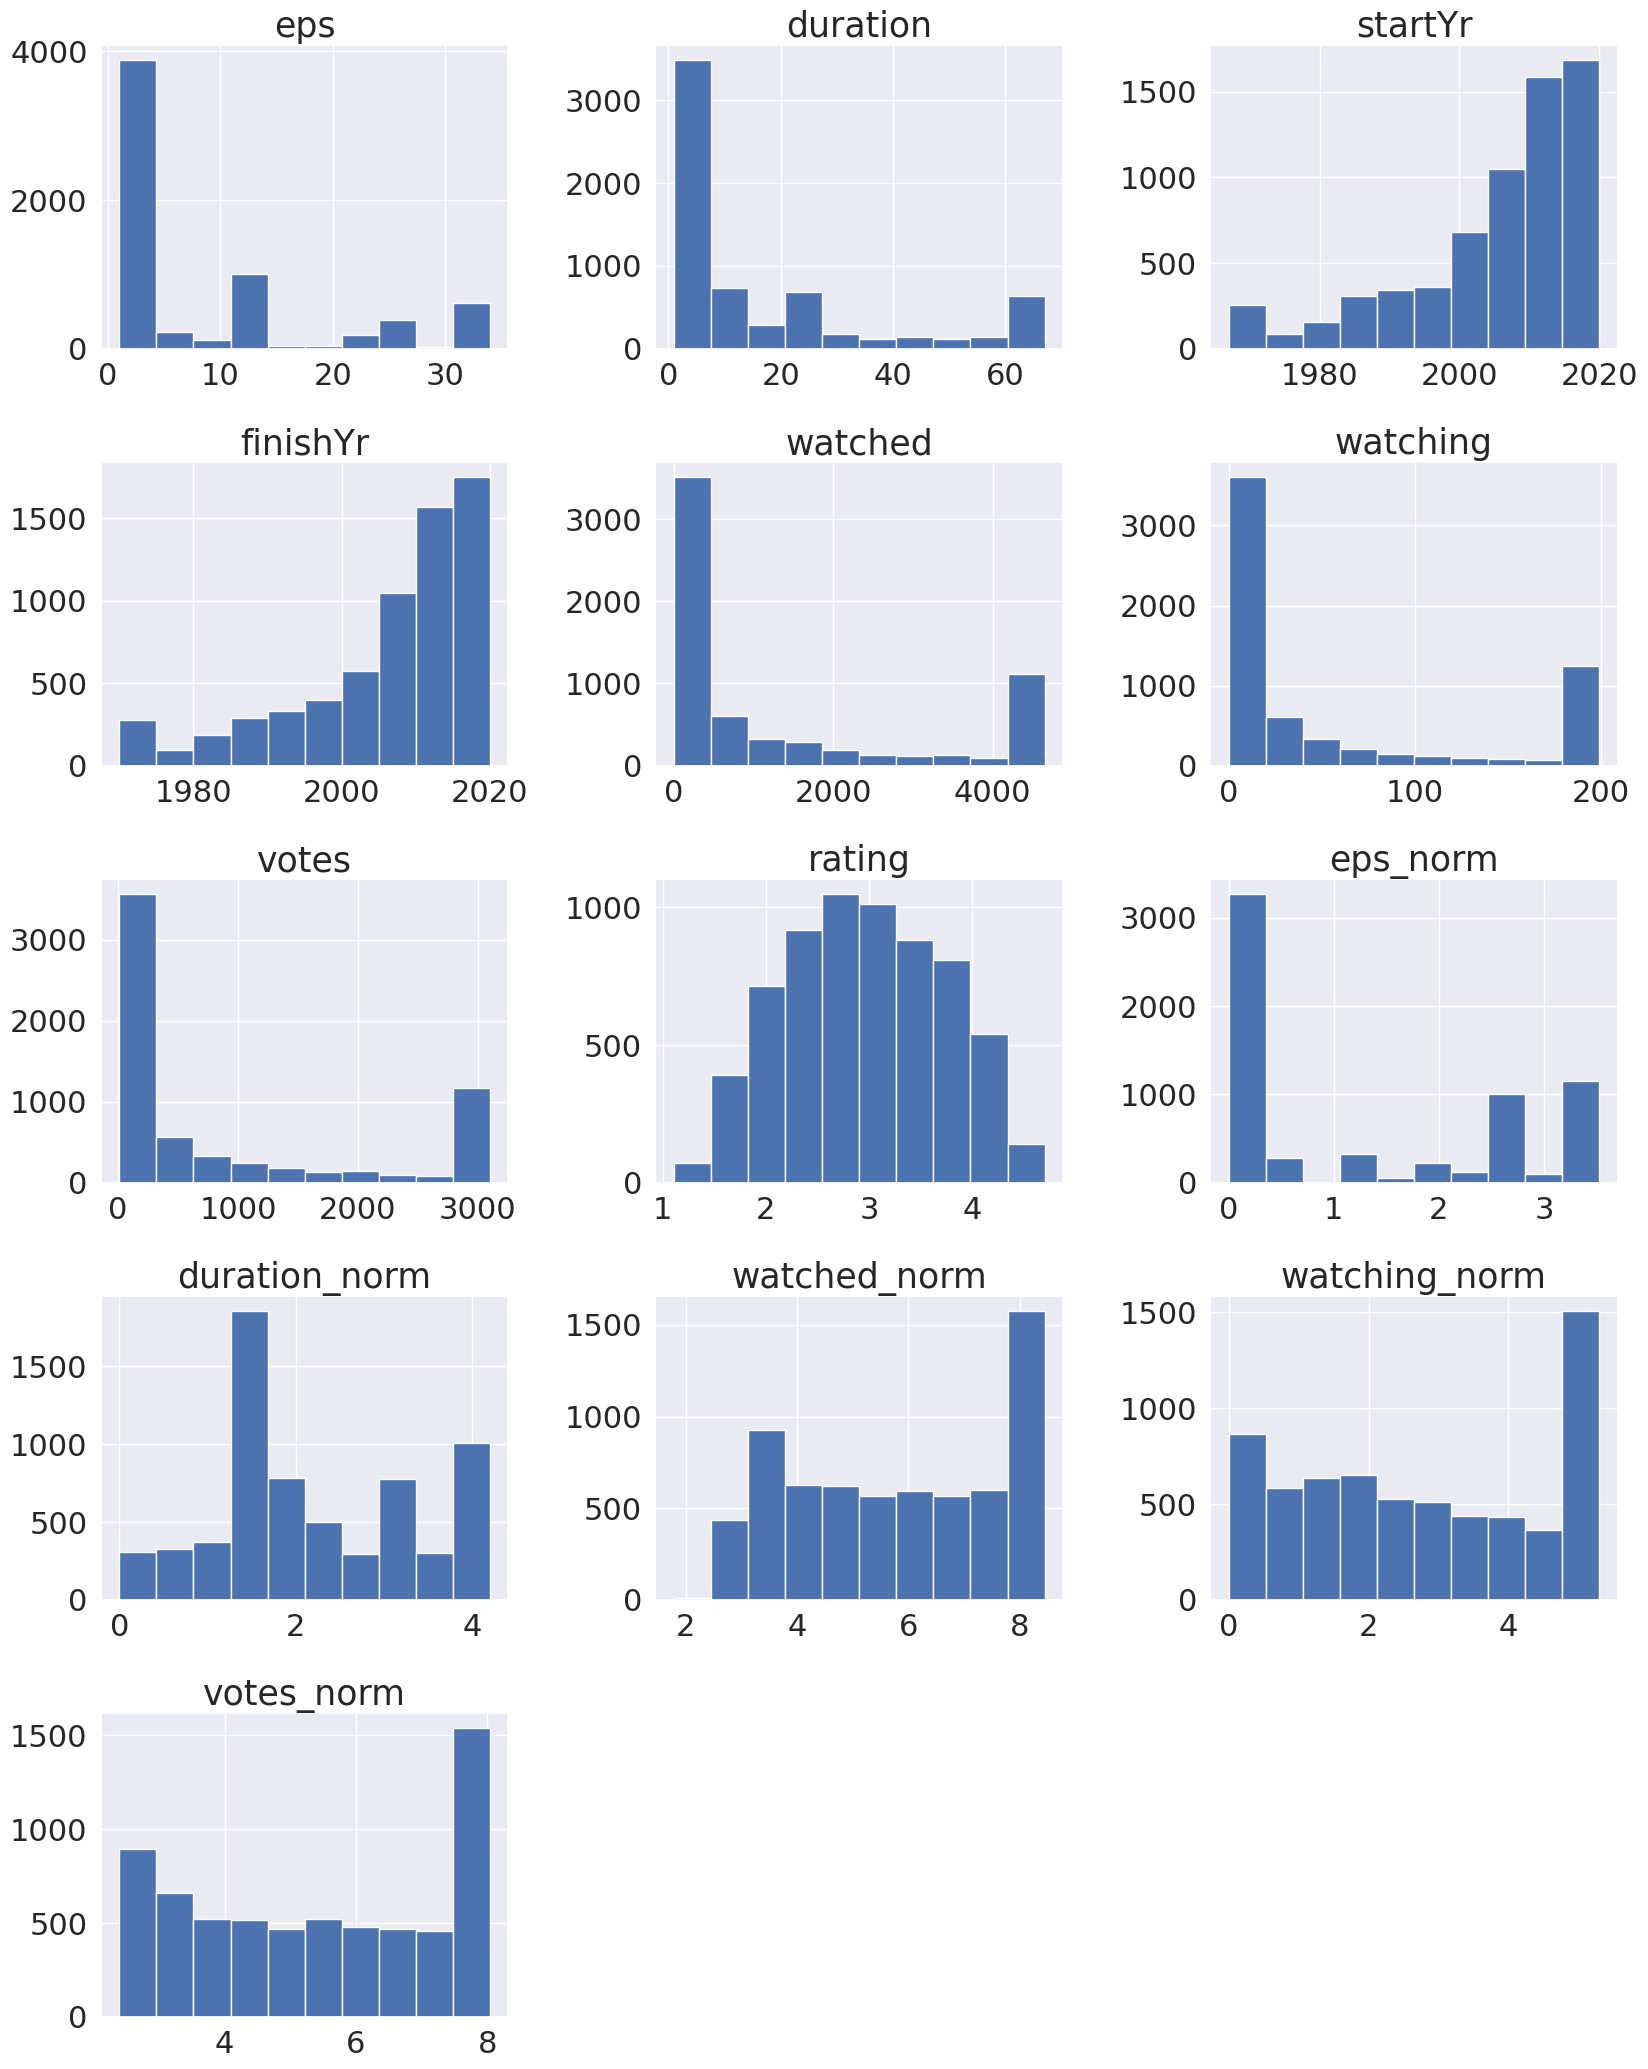

In [101]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)


plt.show()

# Observation
After the feature engineering on the required columns ,

we can observe that the normality in distribution of our data can be seen

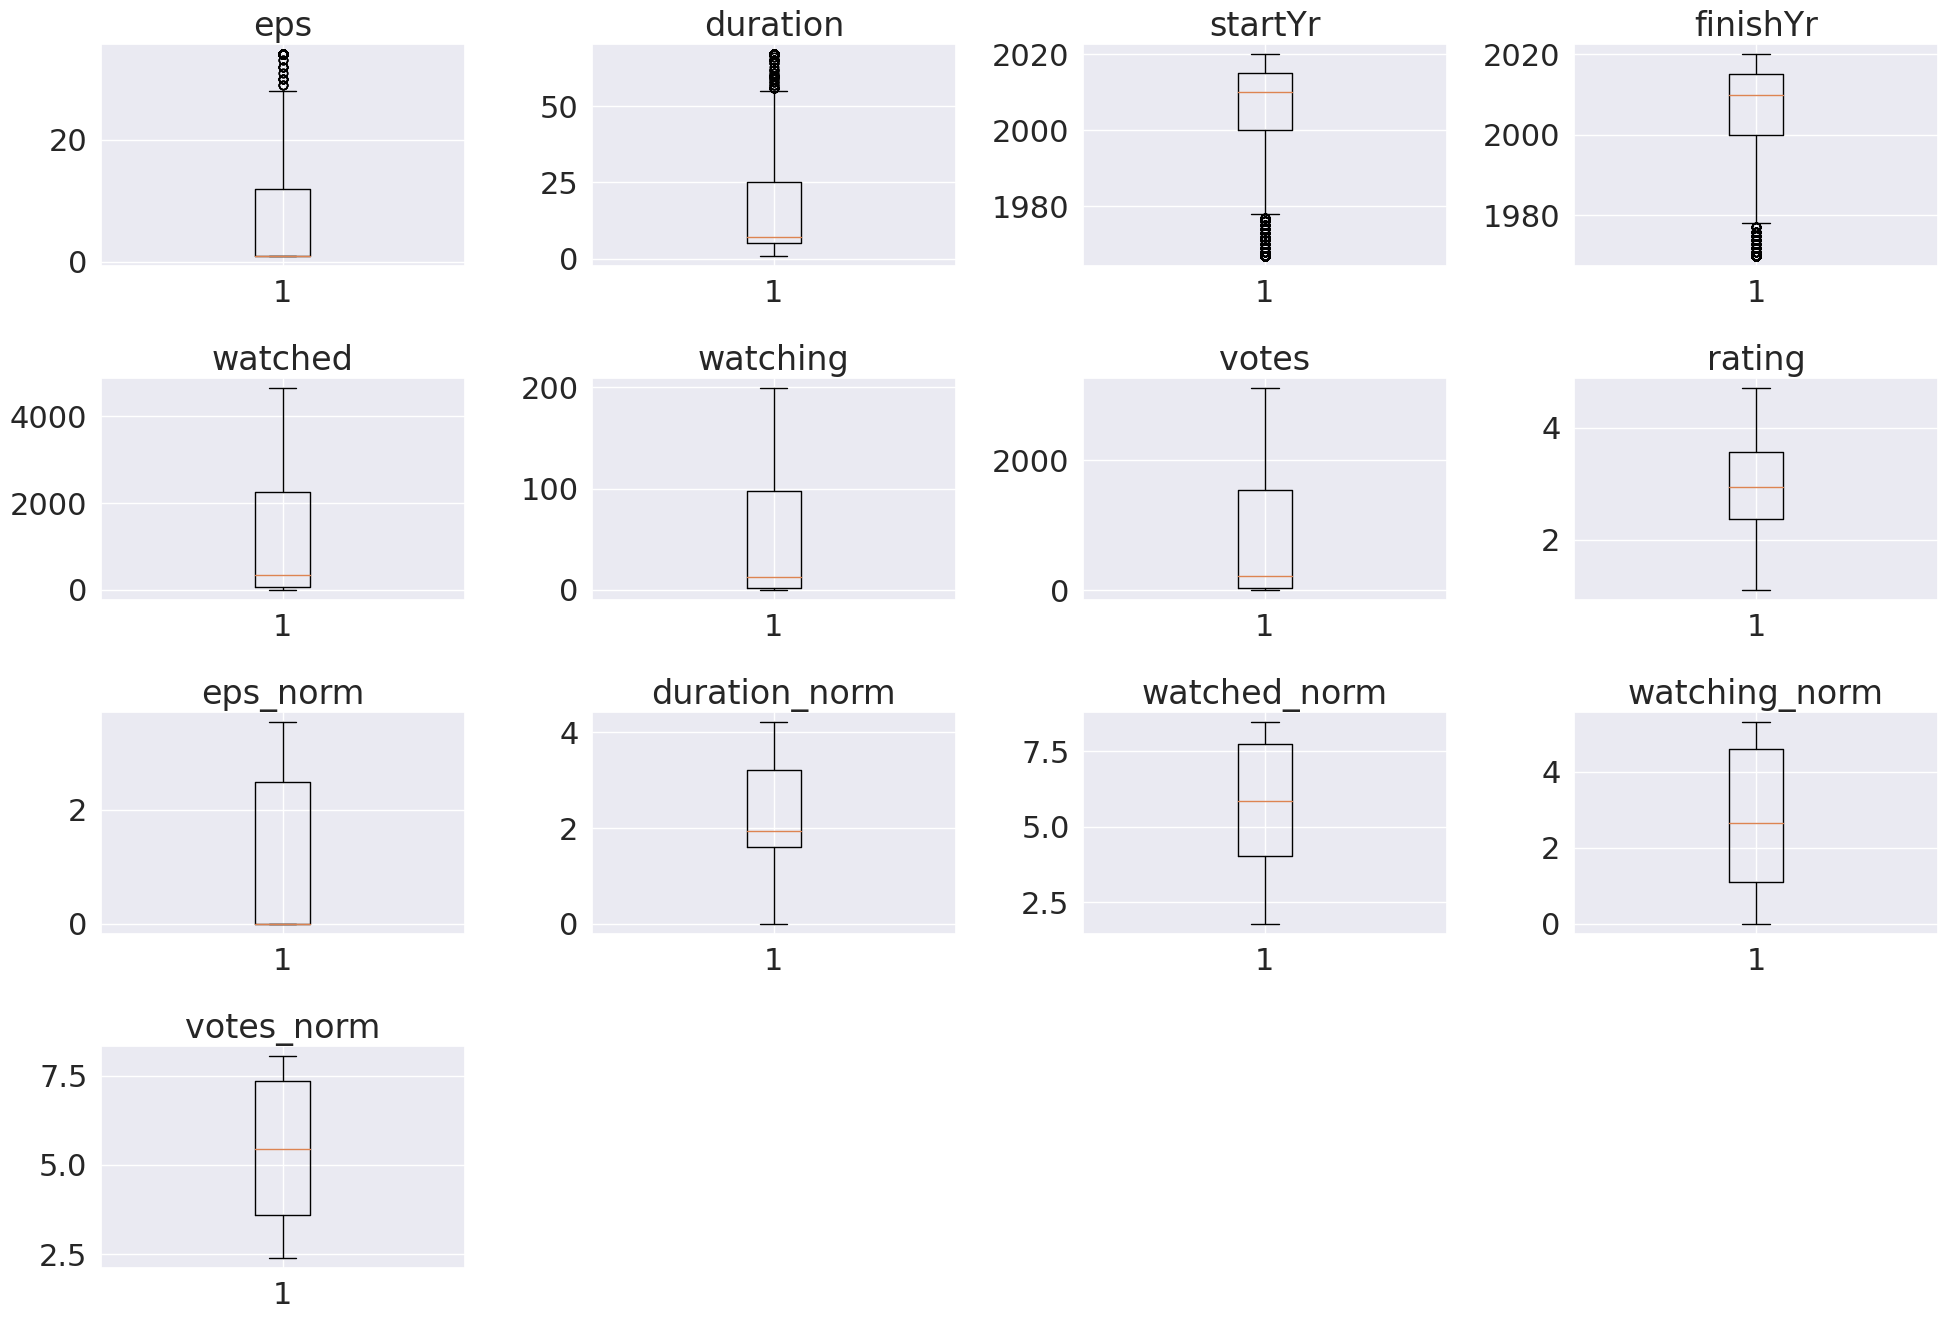

In [102]:
#outlier detection using boxplot
plt.figure(figsize=(20,30))
for i ,variable in enumerate(all_col):
  plt.subplot(9,4,i+1)
  plt.boxplot(df[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

# Observation:-
After the feature engineering on the required columns ,

we can observe that the outliers in our data are removed

In [103]:
df.head()

mediaType  eps  duration  startYr  finishYr contentWarn  watched  \
0        Movie    1    67.000     2015      2015          No     4649   
1        Movie    1     5.000     2008      2008          No       10   
2   TV Special    1    46.000     2014      2014          No     1630   
3        Movie    1    67.000     1984      1984          No     4649   
4  DVD Special    1     4.000     2019      2019          No      346   

   watching    votes  studio_primary studios_colab  genre  rating  eps_norm  \
0        86 3100.000  Toei Animation            No  Other   3.979     0.000   
1         0   10.000          Others            No  Other   2.120     0.000   
2        16 1103.000          Others            No  Other   3.758     0.000   
3       184 3100.000          Others            No  Drama   4.444     0.000   
4         8  234.000          Others            No  Other   2.494     0.000   

   duration_norm  watched_norm  watching_norm  votes_norm  
0          4.205         8.445          4.466       8.039  
1          1.609         2.398          0.000       2.398  
2          3.829         7.397          2.833       7.007  
3          4.205         8.445          5.220       8.039  
4          1.386         5.849          2.197       5.460

# **Correlation**

In [104]:
#Correlation=df.corr()
#Correlation

In [105]:
#f,ax=plt.subplots(figsize=(11,11))
#sns.heatmap(df.corr(),annot=True,linewidths=.3,fmt='1.001f',ax=ax)

In [106]:
df.columns

Index(['mediaType', 'eps', 'duration', 'startYr', 'finishYr', 'contentWarn',
       'watched', 'watching', 'votes', 'studio_primary', 'studios_colab',
       'genre', 'rating', 'eps_norm', 'duration_norm', 'watched_norm',
       'watching_norm', 'votes_norm'],
      dtype='object')

# **Model Building**

In [107]:
# creating Dependant and independant variables
x=df.drop(columns=['rating','eps','duration','watched', 'watching',
       'votes'],axis=1)
y=df["rating"]
x= pd.get_dummies(x,columns = ['mediaType','contentWarn','genre','studio_primary','studios_colab'],drop_first=True)

In [108]:
x.head()

startYr  finishYr  eps_norm  duration_norm  watched_norm  watching_norm  \
0     2015      2015     0.000          4.205         8.445          4.466   
1     2008      2008     0.000          1.609         2.398          0.000   
2     2014      2014     0.000          3.829         7.397          2.833   
3     1984      1984     0.000          4.205         8.445          5.220   
4     2019      2019     0.000          1.386         5.849          2.197   

   votes_norm  mediaType_Movie  mediaType_Music Video  mediaType_OVA  ...  \
0       8.039             True                  False          False  ...   
1       2.398             True                  False          False  ...   
2       7.007            False                  False          False  ...   
3       8.039             True                  False          False  ...   
4       5.460            False                  False          False  ...   

   studio_primary_MADHOUSE  studio_primary_OLM  studio_primary_Others  \
0                    False               False                  False   
1                    False               False                   True   
2                    False               False                   True   
3                    False               False                   True   
4                    False               False                   True   

   studio_primary_Production I.G  studio_primary_Studio Deen  \
0                          False                       False   
1                          False                       False   
2                          False                       False   
3                          False                       False   
4                          False                       False   

   studio_primary_Studio Pierrot  studio_primary_Sunrise  \
0                          False                   False   
1                          False                   False   
2                          False                   False   
3                          False                   False   
4                          False                   False   

   studio_primary_TMS Entertainment  studio_primary_Toei Animation  \
0                             False                           True   
1                             False                          False   
2                             False                          False   
3                             False                          False   
4                             False                          False   

   studios_colab_Yes  
0              False  
1              False  
2              False  
3              False  
4              False  

[5 rows x 34 columns]

In [109]:
y.head()

0   3.979
1   2.120
2   3.758
3   4.444
4   2.494
Name: rating, dtype: float64

In [110]:
#rows and columns of x
x.shape

(6523, 34)

In [111]:
#rows and columns of x
y.shape

(6523,)

In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.3,random_state = 42)

In [113]:
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()
linearregression.fit(x_train,y_train)

LinearRegression()

In [114]:
print("Intercept of the linear equation:", linearregression.intercept_)
print("\nCoefficients of linear equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

pred = linearregression.predict(x_train)

# Here we get the Beta coefficents: β0(intercept) and β1....βn

Intercept of the linear equation: -5.577216182207215

Coefficients of linear equation are: [ 0.01638577 -0.01298801  0.10679928  0.2220134   0.35203176  0.15131087
 -0.20458657 -0.01531815  0.15440155 -0.26572226  0.04480859 -0.21001454
 -0.08763349 -0.11793633 -0.15784069  0.02048365  0.16419647 -0.06193983
  0.29955313  0.02484207  0.05092453  0.05715961 -0.01979406 -0.20590341
 -0.0680751  -0.47591819 -0.21775121  0.05673414 -0.14223803 -0.12162829
 -0.0880376   0.11678581 -0.15632565 -0.11322351]


In [115]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):


    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )
    return df_perf

In [116]:
# Checking model performance on train set
print ("Training Performance\n")
sklmodel_train_perf = model_performance_regression(linearregression,x_train,y_train)
sklmodel_train_perf

Training Performance



RMSE   MAE  R-squared  Adj. R-squared   MAPE
0 0.371 0.310      0.758           0.757 11.385

In [117]:
# Checking model performance on train set
print ("Test Performance\n")
sklmodel_test_perf = model_performance_regression(linearregression,x_test,y_test)
sklmodel_test_perf

Test Performance



RMSE   MAE  R-squared  Adj. R-squared   MAPE
0 0.360 0.300      0.783           0.779 11.148

# USING STATS MODEL

In [119]:
#lets us build linear regression model using statsmodel
x=sm.add_constant(x)
x_train1,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
olsmod0=sm.OLS(y_train,x_train1.astype(float))
olsres0=olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     418.4
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        07:27:47   Log-Likelihood:                -1949.8
No. Observations:                4566   AIC:                             3970.
Df Residuals:                    4531   BIC:                             4194.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<font color = "blue" size = 4>Observation </font>

P value of a variable indicates if the variable is significant or not. If we consider significance level to be 0.05 (5%) than any variable with p-values less than 0.05 would be considered significant.
Negative values of coefficient shows that, Life expectancy deceases with their increase.
Positive values of coefficient shows that, Life expectancy inceases with their increase.
But these variables might contain Multicollinearity which affects the p values, so we first need to deal with multicollinearity and then look for p values

# **Interpreting the Regression Results**

1 Adjusted. R-squared: It reflects the fit of the model.

R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
In our case, the value for Adj. R-squared is 0.75, which is okay!
2 Const coefficient is the Y-intercept.

It means that if all the dependent variables (features: like age, fuel, year of driving experiance and so on..) coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
3 Std err: It reflects the level of accuracy of the coefficients.

The lower it is, the higher is the level of accuracy.
4 P >|t|: It is p-value

Pr(>|t|) : For each independent feature there is a null hypothesis and alternate hypothesis

Ho : Independent feature is not significant

Ha : Independent feature is that it is significant

Pr(>|t|) gives P-value for each independent feature to check that null hypothesis. we are considering 0.05 (5%) as significance level

A p-value of less than 0.05 is considered to be statistically significant.

<br/>
<font color = "brown" size = 5>Test of Multicolinearity </font>

*   Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, The coefficients that the model suggests are unreliable.
*   There are different ways of detecting(or testing) multi-collinearity, one such way is Variation Inflation Factor.
*   Variance Inflation factor: Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient βkis “inflated”by the existence of correlation among the predictor variables in the model.
*   General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and hence the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.


In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(x.values.astype(float),i) for i in range(x.shape[1])],index=x.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                              49411.865
startYr                              315.282
finishYr                             315.918
eps_norm                               6.274
duration_norm                          2.732
watched_norm                          86.347
watching_norm                          9.837
votes_norm                            95.496
mediaType_Movie                        4.067
mediaType_Music Video                  2.670
mediaType_OVA                          3.266
mediaType_Other                        1.732
mediaType_TV                           6.756
mediaType_TV Special                   1.819
mediaType_Web                          2.300
contentWarn_Yes                        1.103
genre_Adventure                        4.336
genre_Based on a Manga                 1.668
genre_Comedy                           2.295
genre_Drama                            2.932
genre_Fantasy                          2.087
genre_Other         

In [126]:
# we drop the one with the highest vif values and check the multicolinearity again
x_train2 = x_train1.drop('finishYr', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(x_train2.values.astype(float),i) for i in range(x_train2.shape[1])],index=x_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                              41275.647
startYr                                1.738
eps_norm                               6.047
duration_norm                          2.711
watched_norm                          83.567
watching_norm                          9.595
votes_norm                            92.110
mediaType_Movie                        3.970
mediaType_Music Video                  2.648
mediaType_OVA                          3.159
mediaType_Other                        1.727
mediaType_TV                           6.709
mediaType_TV Special                   1.803
mediaType_Web                          2.228
contentWarn_Yes                        1.106
genre_Adventure                        4.344
genre_Based on a Manga                 1.651
genre_Comedy                           2.293
genre_Drama                            2.962
genre_Fantasy                          1.983
genre_Other                           11.769
genre_Romance       

In [127]:
# we drop the one with the highest vif values and check the multicolinearity again
x_train3 = x_train2.drop('votes_norm', axis=1)
vif_series3 = pd.Series([variance_inflation_factor(x_train3.values.astype(float),i) for i in range(x_train3.shape[1])],index=x_train3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

const                              41275.364
startYr                                1.738
eps_norm                               5.966
duration_norm                          2.702
watched_norm                           5.931
watching_norm                          8.919
mediaType_Movie                        3.966
mediaType_Music Video                  2.648
mediaType_OVA                          3.156
mediaType_Other                        1.726
mediaType_TV                           6.550
mediaType_TV Special                   1.803
mediaType_Web                          2.220
contentWarn_Yes                        1.104
genre_Adventure                        4.344
genre_Based on a Manga                 1.651
genre_Comedy                           2.291
genre_Drama                            2.960
genre_Fantasy                          1.983
genre_Other                           11.769
genre_Romance                          3.455
genre_Sci Fi        

In [128]:
# we drop the one with the highest vif values and check the multicolinearity again
x_train4 = x_train3.drop('genre_Other', axis=1)
vif_series4 = pd.Series([variance_inflation_factor(x_train4.values.astype(float),i) for i in range(x_train4.shape[1])],index=x_train4.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series4))

Series before feature selection: 

const                              41218.654
startYr                                1.738
eps_norm                               5.965
duration_norm                          2.688
watched_norm                           5.929
watching_norm                          8.915
mediaType_Movie                        3.963
mediaType_Music Video                  2.647
mediaType_OVA                          3.155
mediaType_Other                        1.726
mediaType_TV                           6.550
mediaType_TV Special                   1.800
mediaType_Web                          2.219
contentWarn_Yes                        1.102
genre_Adventure                        1.081
genre_Based on a Manga                 1.019
genre_Comedy                           1.044
genre_Drama                            1.035
genre_Fantasy                          1.016
genre_Romance                          1.027
genre_Sci Fi                           1.025
studio_primary_J.C. 

In [129]:
# we drop the one with the highest vif values and check the multicolinearity again
x_train5 = x_train4.drop('studio_primary_Others', axis=1)
vif_series5 = pd.Series([variance_inflation_factor(x_train5.values.astype(float),i) for i in range(x_train5.shape[1])],index=x_train5.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series5))

Series before feature selection: 

const                              41015.033
startYr                                1.736
eps_norm                               5.959
duration_norm                          2.685
watched_norm                           5.921
watching_norm                          8.911
mediaType_Movie                        3.956
mediaType_Music Video                  2.645
mediaType_OVA                          3.149
mediaType_Other                        1.725
mediaType_TV                           6.549
mediaType_TV Special                   1.800
mediaType_Web                          2.218
contentWarn_Yes                        1.102
genre_Adventure                        1.080
genre_Based on a Manga                 1.019
genre_Comedy                           1.044
genre_Drama                            1.034
genre_Fantasy                          1.016
genre_Romance                          1.026
genre_Sci Fi                           1.025
studio_primary_J.C. 

In [130]:
# we drop the one with the highest vif values and check the multicolinearity again
x_train6 = x_train5.drop('watching_norm', axis=1)
vif_series6 = pd.Series([variance_inflation_factor(x_train6.values.astype(float),i) for i in range(x_train6.shape[1])],index=x_train6.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series6))

Series before feature selection: 

const                              32664.829
startYr                                1.407
eps_norm                               4.930
duration_norm                          2.587
watched_norm                           1.553
mediaType_Movie                        3.938
mediaType_Music Video                  2.612
mediaType_OVA                          3.148
mediaType_Other                        1.722
mediaType_TV                           6.528
mediaType_TV Special                   1.800
mediaType_Web                          2.216
contentWarn_Yes                        1.095
genre_Adventure                        1.075
genre_Based on a Manga                 1.017
genre_Comedy                           1.043
genre_Drama                            1.033
genre_Fantasy                          1.015
genre_Romance                          1.024
genre_Sci Fi                           1.025
studio_primary_J.C. Staff              1.051
studio_primary_MADHO

In [131]:
# we drop the one with the highest vif values and check the multicolinearity again
x_train7 = x_train6.drop('mediaType_TV', axis=1)
vif_series7 = pd.Series([variance_inflation_factor(x_train7.values.astype(float),i) for i in range(x_train7.shape[1])],index=x_train7.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series7))

Series before feature selection: 

const                              32622.470
startYr                                1.406
eps_norm                               3.075
duration_norm                          2.586
watched_norm                           1.549
mediaType_Movie                        3.398
mediaType_Music Video                  2.270
mediaType_OVA                          2.351
mediaType_Other                        1.465
mediaType_TV Special                   1.602
mediaType_Web                          1.573
contentWarn_Yes                        1.094
genre_Adventure                        1.075
genre_Based on a Manga                 1.014
genre_Comedy                           1.026
genre_Drama                            1.033
genre_Fantasy                          1.012
genre_Romance                          1.024
genre_Sci Fi                           1.025
studio_primary_J.C. Staff              1.051
studio_primary_MADHOUSE                1.042
studio_primary_OLM  

In [133]:
olsmod1 = sm.OLS(y_train, x_train7.astype(float))
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     459.1
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        07:54:16   Log-Likelihood:                -2125.0
No. Observations:                4566   AIC:                             4308.
Df Residuals:                    4537   BIC:                             4494.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [135]:
x_train8=x_train7.drop('mediaType_TV Special',axis=1)
olsmod2 = sm.OLS(y_train, x_train8.astype(float))
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     476.2
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        07:58:33   Log-Likelihood:                -2125.0
No. Observations:                4566   AIC:                             4306.
Df Residuals:                    4538   BIC:                             4486.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [136]:
x_train9=x_train8.drop('genre_Fantasy',axis=1)
olsmod3 = sm.OLS(y_train, x_train9.astype(float))
olsres3 = olsmod3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     494.7
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        08:03:02   Log-Likelihood:                -2125.0
No. Observations:                4566   AIC:                             4304.
Df Residuals:                    4539   BIC:                             4478.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [137]:
x_train10=x_train9.drop('studio_primary_J.C. Staff',axis=1)
olsmod4 = sm.OLS(y_train, x_train10.astype(float))
olsres4 = olsmod4.fit()
print(olsres4.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     514.5
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        08:04:17   Log-Likelihood:                -2125.1
No. Observations:                4566   AIC:                             4302.
Df Residuals:                    4540   BIC:                             4469.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [140]:
x_train11=x_train10.drop('mediaType_Web',axis=1)
olsmod5 = sm.OLS(y_train, x_train11.astype(float))
olsres5 = olsmod5.fit()
print(olsres5.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     536.1
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        08:06:17   Log-Likelihood:                -2125.2
No. Observations:                4566   AIC:                             4300.
Df Residuals:                    4541   BIC:                             4461.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [142]:
x_train12=x_train11.drop('genre_Romance',axis=1)
olsmod6 = sm.OLS(y_train, x_train12.astype(float))
olsres6 = olsmod6.fit()
print(olsres6.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     559.4
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        08:08:46   Log-Likelihood:                -2125.4
No. Observations:                4566   AIC:                             4299.
Df Residuals:                    4542   BIC:                             4453.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [143]:
x_train13=x_train12.drop('genre_Comedy',axis=1)
olsmod7 = sm.OLS(y_train, x_train13.astype(float))
olsres7 = olsmod7.fit()
print(olsres7.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     584.5
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        08:11:53   Log-Likelihood:                -2126.8
No. Observations:                4566   AIC:                             4300.
Df Residuals:                    4543   BIC:                             4447.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [144]:
x_train14=x_train13.drop('studio_primary_Studio Deen',axis=1)
olsmod8 = sm.OLS(y_train, x_train14.astype(float))
olsres8 = olsmod8.fit()
print(olsres8.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     611.9
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        08:14:35   Log-Likelihood:                -2128.4
No. Observations:                4566   AIC:                             4301.
Df Residuals:                    4544   BIC:                             4442.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [145]:
x_train15=x_train14.drop('studio_primary_Studio Pierrot',axis=1)
olsmod9 = sm.OLS(y_train, x_train15.astype(float))
olsres9 = olsmod9.fit()
print(olsres9.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     642.0
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        08:16:11   Log-Likelihood:                -2130.1
No. Observations:                4566   AIC:                             4302.
Df Residuals:                    4545   BIC:                             4437.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [146]:
x_train16=x_train15.drop('genre_Sci Fi',axis=1)
olsmod10 = sm.OLS(y_train, x_train16.astype(float))
olsres10 = olsmod10.fit()
print(olsres10.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     675.2
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        08:17:52   Log-Likelihood:                -2131.9
No. Observations:                4566   AIC:                             4304.
Df Residuals:                    4546   BIC:                             4432.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<font color = "black" size = 5>Checking the Linear Regression Assumptions </font>

* Linearity of variables
* Normality of error terms
* Homoscedasticity
* Independence of errors from predictor variables

In [147]:
# RESIDUAL

residual=olsres10.resid
np.mean(residual)

-4.4478559152823314e-14

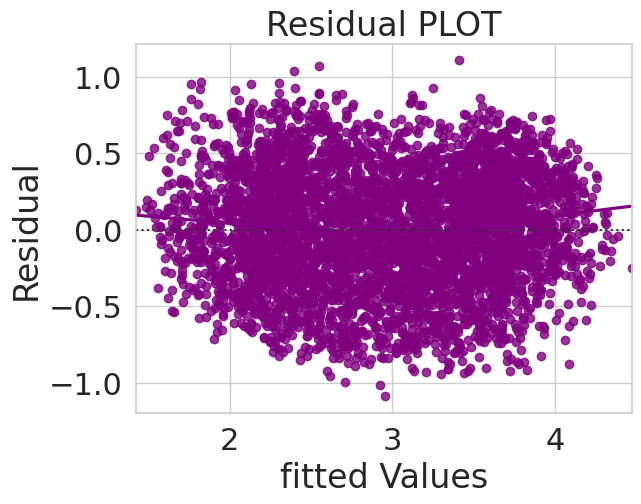

In [148]:
# Scatter Plot
residual=olsres10.resid
fitted=olsres7.fittedvalues
sns.set_style("whitegrid")
sns.residplot(x=fitted,y=residual,color='purple',lowess=True)
plt.xlabel("fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

<Axes: ylabel='Count'>

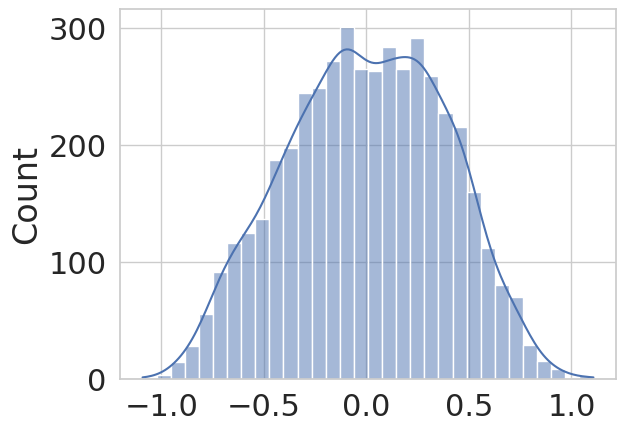

In [149]:
# HISTOGRAM ON RESIDUAL VALUES
sns.histplot(residual,kde=True)

#### The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line

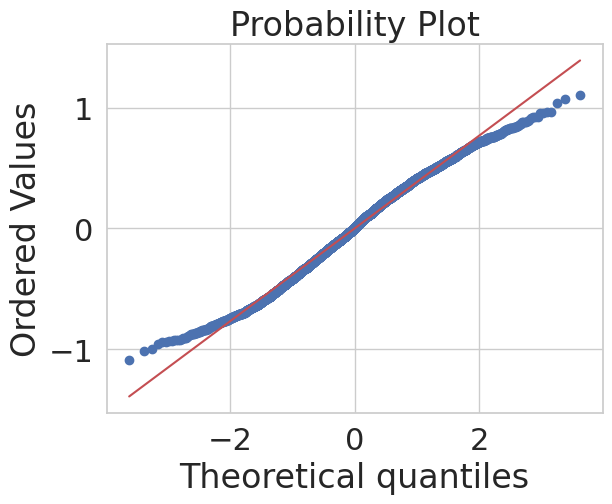

In [150]:
# PROBABILITY PLOT ON RESIDUAL
import pylab
import scipy.stats as stats
stats.probplot(residual, dist='norm',plot=pylab)
plt.show()

* The residuals are not normal as per shapiro test, but as per QQ plot they are approximately normal.
* The issue with shapiro test is when dataset is big, even for small deviations, it shows data as not normal
* Hence we go with QQ plot and say that residuals are normal
* We can try to treat data for outliers and see if that helps in further normalising the residual curve

In [153]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name=['F statstic','p-value']
test=sms.het_goldfeldquandt(residual,x_train16.astype(float))
lzip(name,test)

[('F statstic', 1.0491194759056313), ('p-value', 0.12706753444772492)]

# **Observation**

Since p-value > 0.05 we can say that the residuals are homoscedastic. This assumption is therefore valid in the data.

# **Predicting on the test data**

In [154]:
x_train16.columns

Index(['const', 'startYr', 'eps_norm', 'duration_norm', 'watched_norm',
       'mediaType_Movie', 'mediaType_Music Video', 'mediaType_OVA',
       'mediaType_Other', 'contentWarn_Yes', 'genre_Adventure',
       'genre_Based on a Manga', 'genre_Drama', 'studio_primary_MADHOUSE',
       'studio_primary_OLM', 'studio_primary_Production I.G',
       'studio_primary_Sunrise', 'studio_primary_TMS Entertainment',
       'studio_primary_Toei Animation', 'studios_colab_Yes'],
      dtype='object')

In [155]:
x_test_final=x_test[x_train16.columns]
x_test_final.head()

const  startYr  eps_norm  duration_norm  watched_norm  mediaType_Movie  \
5193  1.000     2018     0.000          3.178         7.799            False   
5238  1.000     1993     0.000          1.386         4.644             True   
6121  1.000     2017     0.000          3.332         8.445            False   
2304  1.000     1987     1.099          3.401         4.625            False   
4922  1.000     1991     0.000          4.205         5.656             True   

      mediaType_Music Video  mediaType_OVA  mediaType_Other  contentWarn_Yes  \
5193                  False          False            False             True   
5238                  False          False            False            False   
6121                  False           True            False            False   
2304                  False           True            False             True   
4922                  False          False            False            False   

      genre_Adventure  genre_Based on a Manga  genre_Drama  \
5193            False                   False        False   
5238            False                   False        False   
6121            False                   False        False   
2304            False                   False        False   
4922            False                   False        False   

      studio_primary_MADHOUSE  studio_primary_OLM  \
5193                    False               False   
5238                    False               False   
6121                    False               False   
2304                    False               False   
4922                    False               False   

      studio_primary_Production I.G  studio_primary_Sunrise  \
5193                          False                   False   
5238                          False                   False   
6121                          False                   False   
2304                          False                   False   
4922                          False                   False   

      studio_primary_TMS Entertainment  studio_primary_Toei Animation  \
5193                             False                          False   
5238                             False                          False   
6121                             False                          False   
2304                             False                          False   
4922                             False                          False   

      studios_colab_Yes  
5193              False  
5238              False  
6121              False  
2304              False  
4922              False

In [156]:
y_pred=olsres10.predict(x_test_final)

# **checking the performance on the Train data**

In [157]:
print("Training Performance\n")
sklmodel_train_perf = model_performance_regression(olsres10, x_train16, y_train)
sklmodel_train_perf

Training Performance



RMSE   MAE  R-squared  Adj. R-squared   MAPE
0 0.386 0.320      0.738           0.737 11.808

# **checking the performance on the Test data**

In [158]:
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsres10, x_test_final, y_test)
olsmodel_test_perf

Test Performance



RMSE   MAE  R-squared  Adj. R-squared   MAPE
0 0.378 0.314      0.761           0.759 11.720

# **DecisionTree**

In [181]:
def model_performance_regression(model, predictors, target):
  def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))
  def mape_score(targets, predictions):
      # Check if targets and predictions are DataFrames
      if isinstance(targets, pd.DataFrame) and isinstance(predictions, pd.DataFrame):
          # Calculate MAPE for each column and return the mean
          mape_values = []
          for column in targets.columns:
              mape_values.append(np.mean(np.abs(targets[column] - predictions[column]) / targets[column]) * 100)
          return np.mean(mape_values)
      else:
          # Calculate MAPE for one-dimensional arrays
          targets = targets.ravel()  # Flatten the target array
          predictions = predictions.ravel()  # Flatten the prediction array
          return np.mean(np.abs(targets - predictions) / targets) * 100
  pred = model.predict(predictors)
  pred = pred.reshape(len(target), 1)  # Reshape predictions to match target shape
  r2 = r2_score(target, pred)  # to compute R-squared
  adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
  rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
  mae = mean_absolute_error(target, pred)  # to compute MAE
  mape = mape_score(target, pred)  # to compute MAPE

  # creating a dataframe of metrics
  metrix = {'RMSE': rmse, 'MAE': mae, 'MAPE': mape,'R2':r2,'adj_R2':adjr2}
  metrix_frame = pd.DataFrame(metrix, index=[0])
  return metrix_frame



In [214]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.3,random_state = 42)
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(criterion='squared_error',max_depth=2,random_state=10,
                            min_samples_split=6,min_samples_leaf=4)
d_T_R=model.fit(x_train,y_train)
d_T_R.score(x_train,y_train)

0.6395742444391023

In [215]:
print("Training Performance\n")
sklmodel_train_perf = model_performance_regression(d_T_R, x_train, y_train)
sklmodel_train_perf

Training Performance



RMSE   MAE   MAPE    R2  adj_R2
0 0.453 0.369 13.835 0.640   0.637

In [216]:
# Checking model performance on train set
print ("Test Performance\n")
sklmodel_test_perf = model_performance_regression(d_T_R,x_test,y_test)
sklmodel_test_perf

Test Performance



RMSE   MAE   MAPE    R2  adj_R2
0 0.444 0.362 13.780 0.671   0.665

In [223]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(max_depth=2,min_samples_split=10,min_samples_leaf=5,random_state=42)
rf_regressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [224]:
print("Training Performance\n")
sklmodel_train_perf = model_performance_regression(d_T_R, x_train, y_train)
sklmodel_train_perf

Training Performance



RMSE   MAE   MAPE    R2  adj_R2
0 0.453 0.369 13.835 0.640   0.637

In [225]:
# Checking model performance on train set
print ("Test Performance\n")
sklmodel_test_perf = model_performance_regression(d_T_R,x_test,y_test)
sklmodel_test_perf

Test Performance



RMSE   MAE   MAPE    R2  adj_R2
0 0.444 0.362 13.780 0.671   0.665

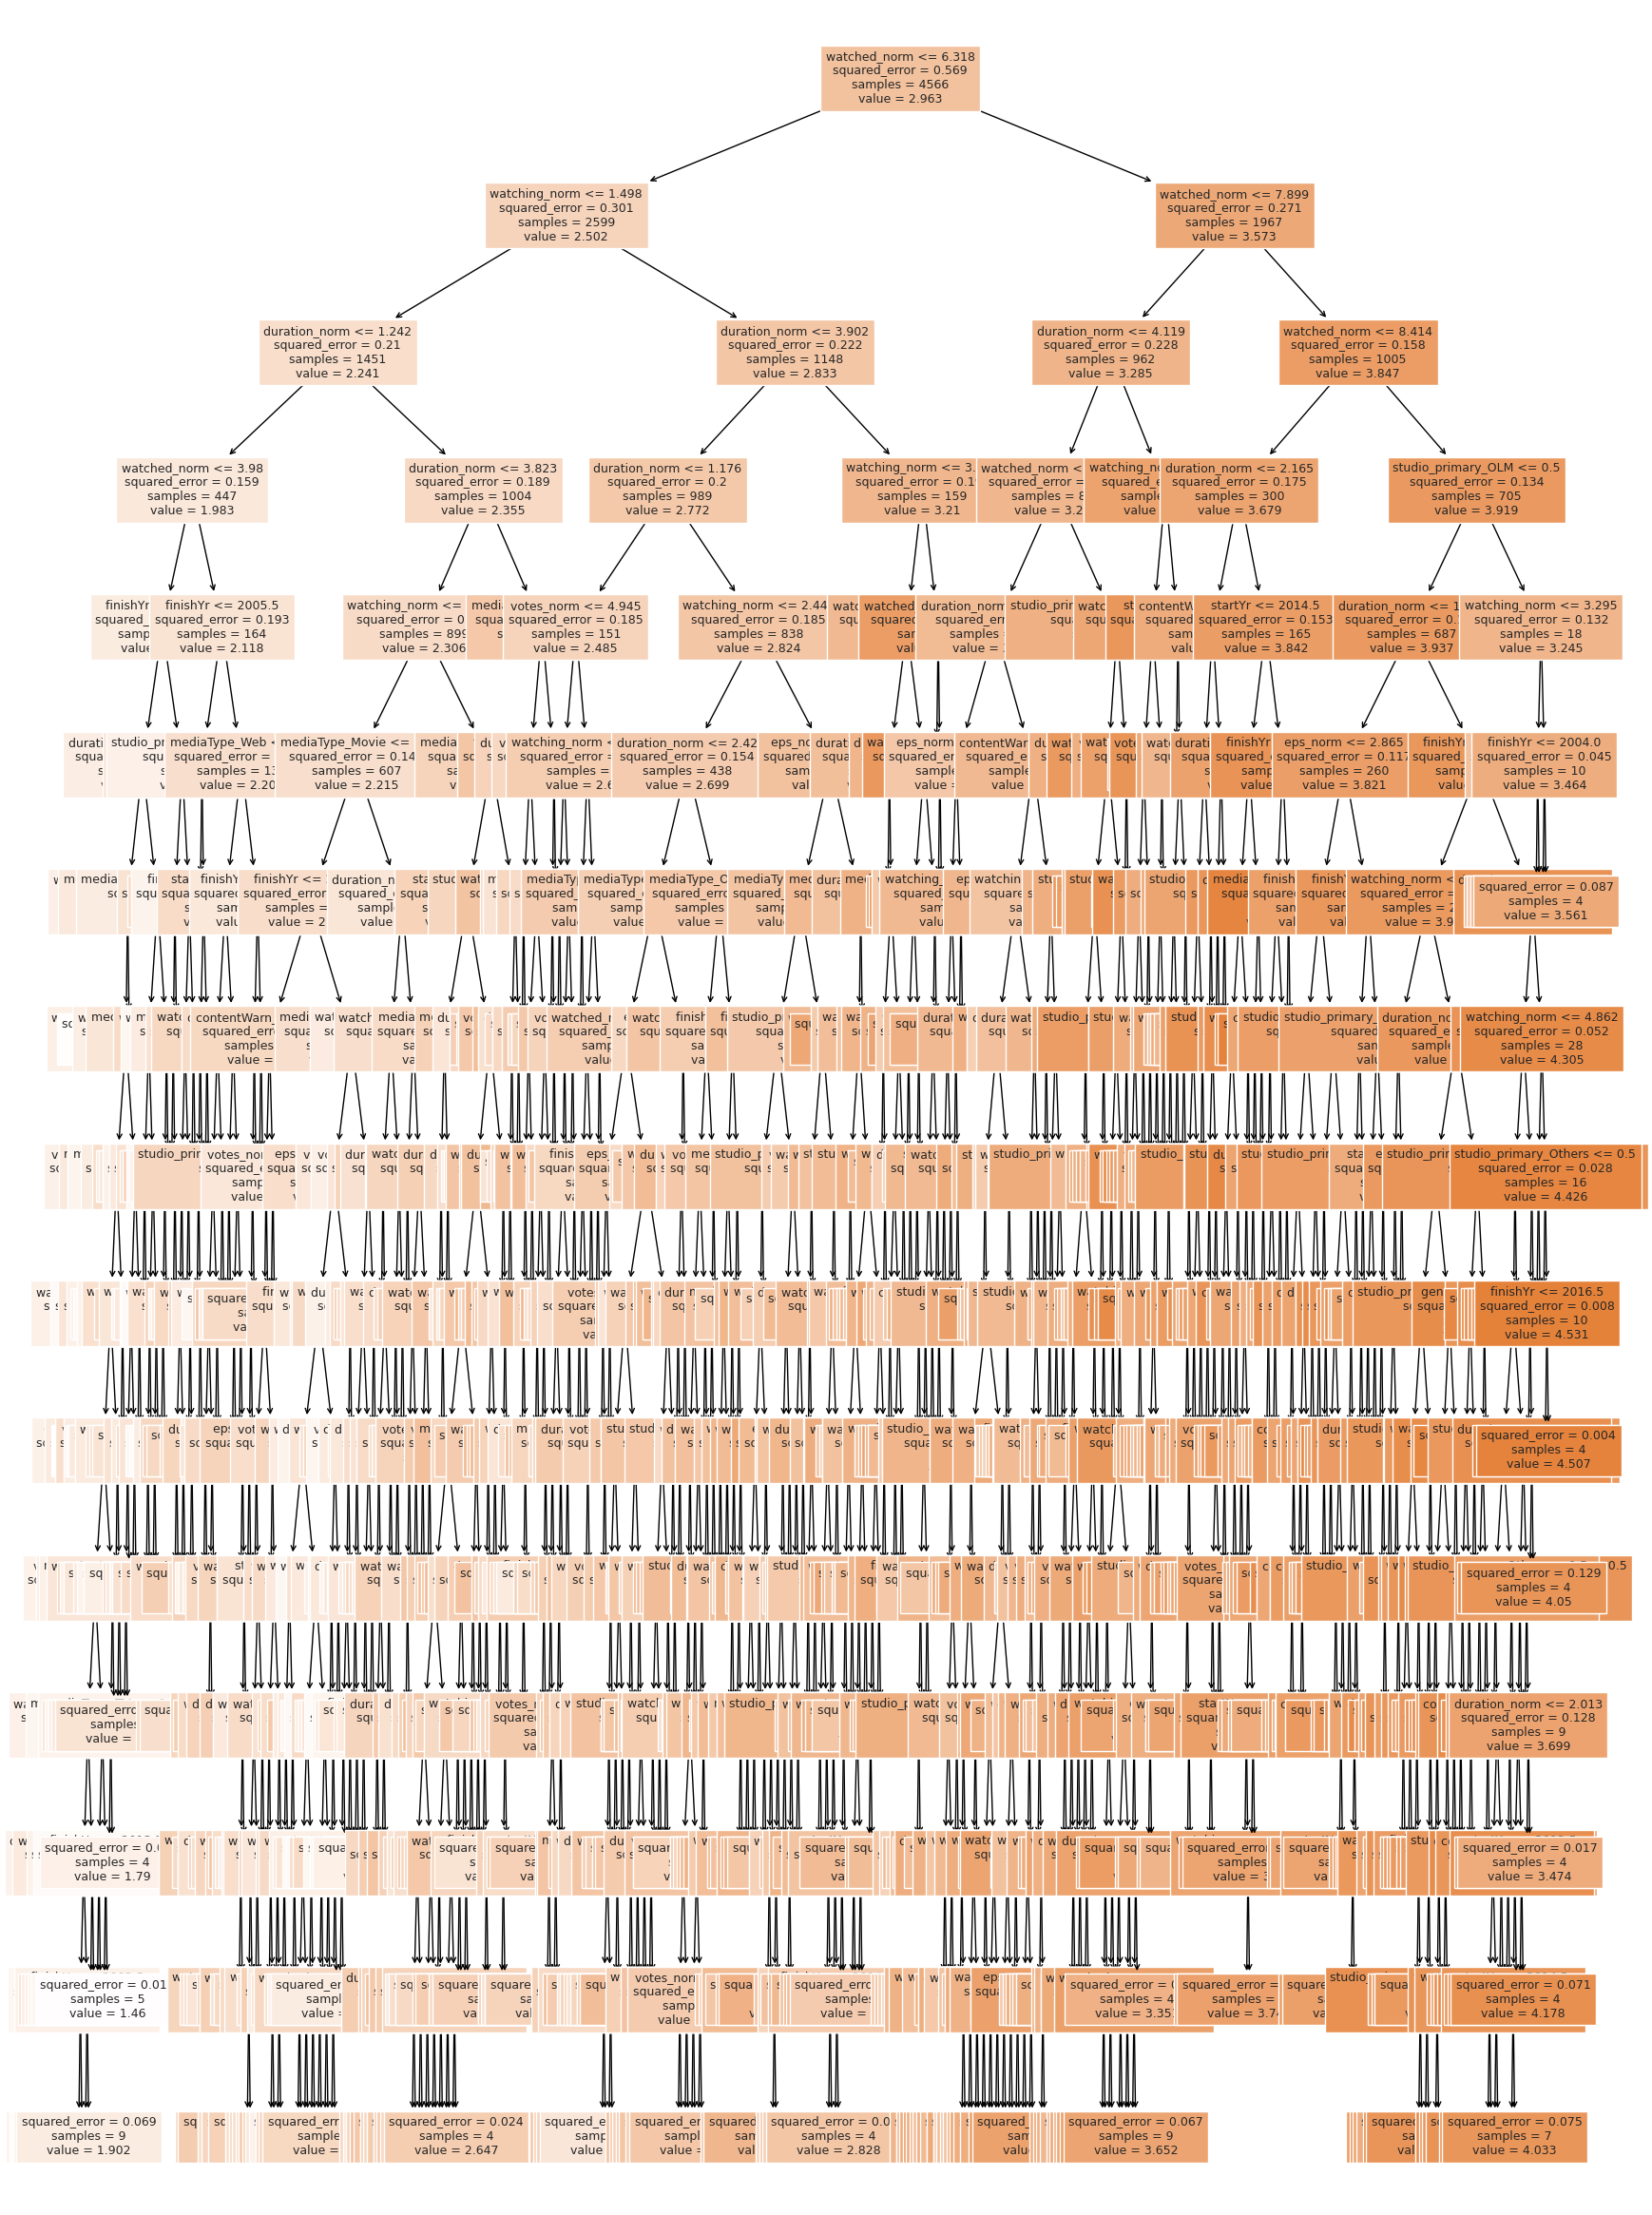

In [207]:
from sklearn import tree
features_names=x.columns
plt.figure(figsize=(20,30))
out=tree.plot_tree(d_T_R,feature_names=features_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
  arrow=o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor("black")
    arrow.set_linewidth(1)
plt.show()

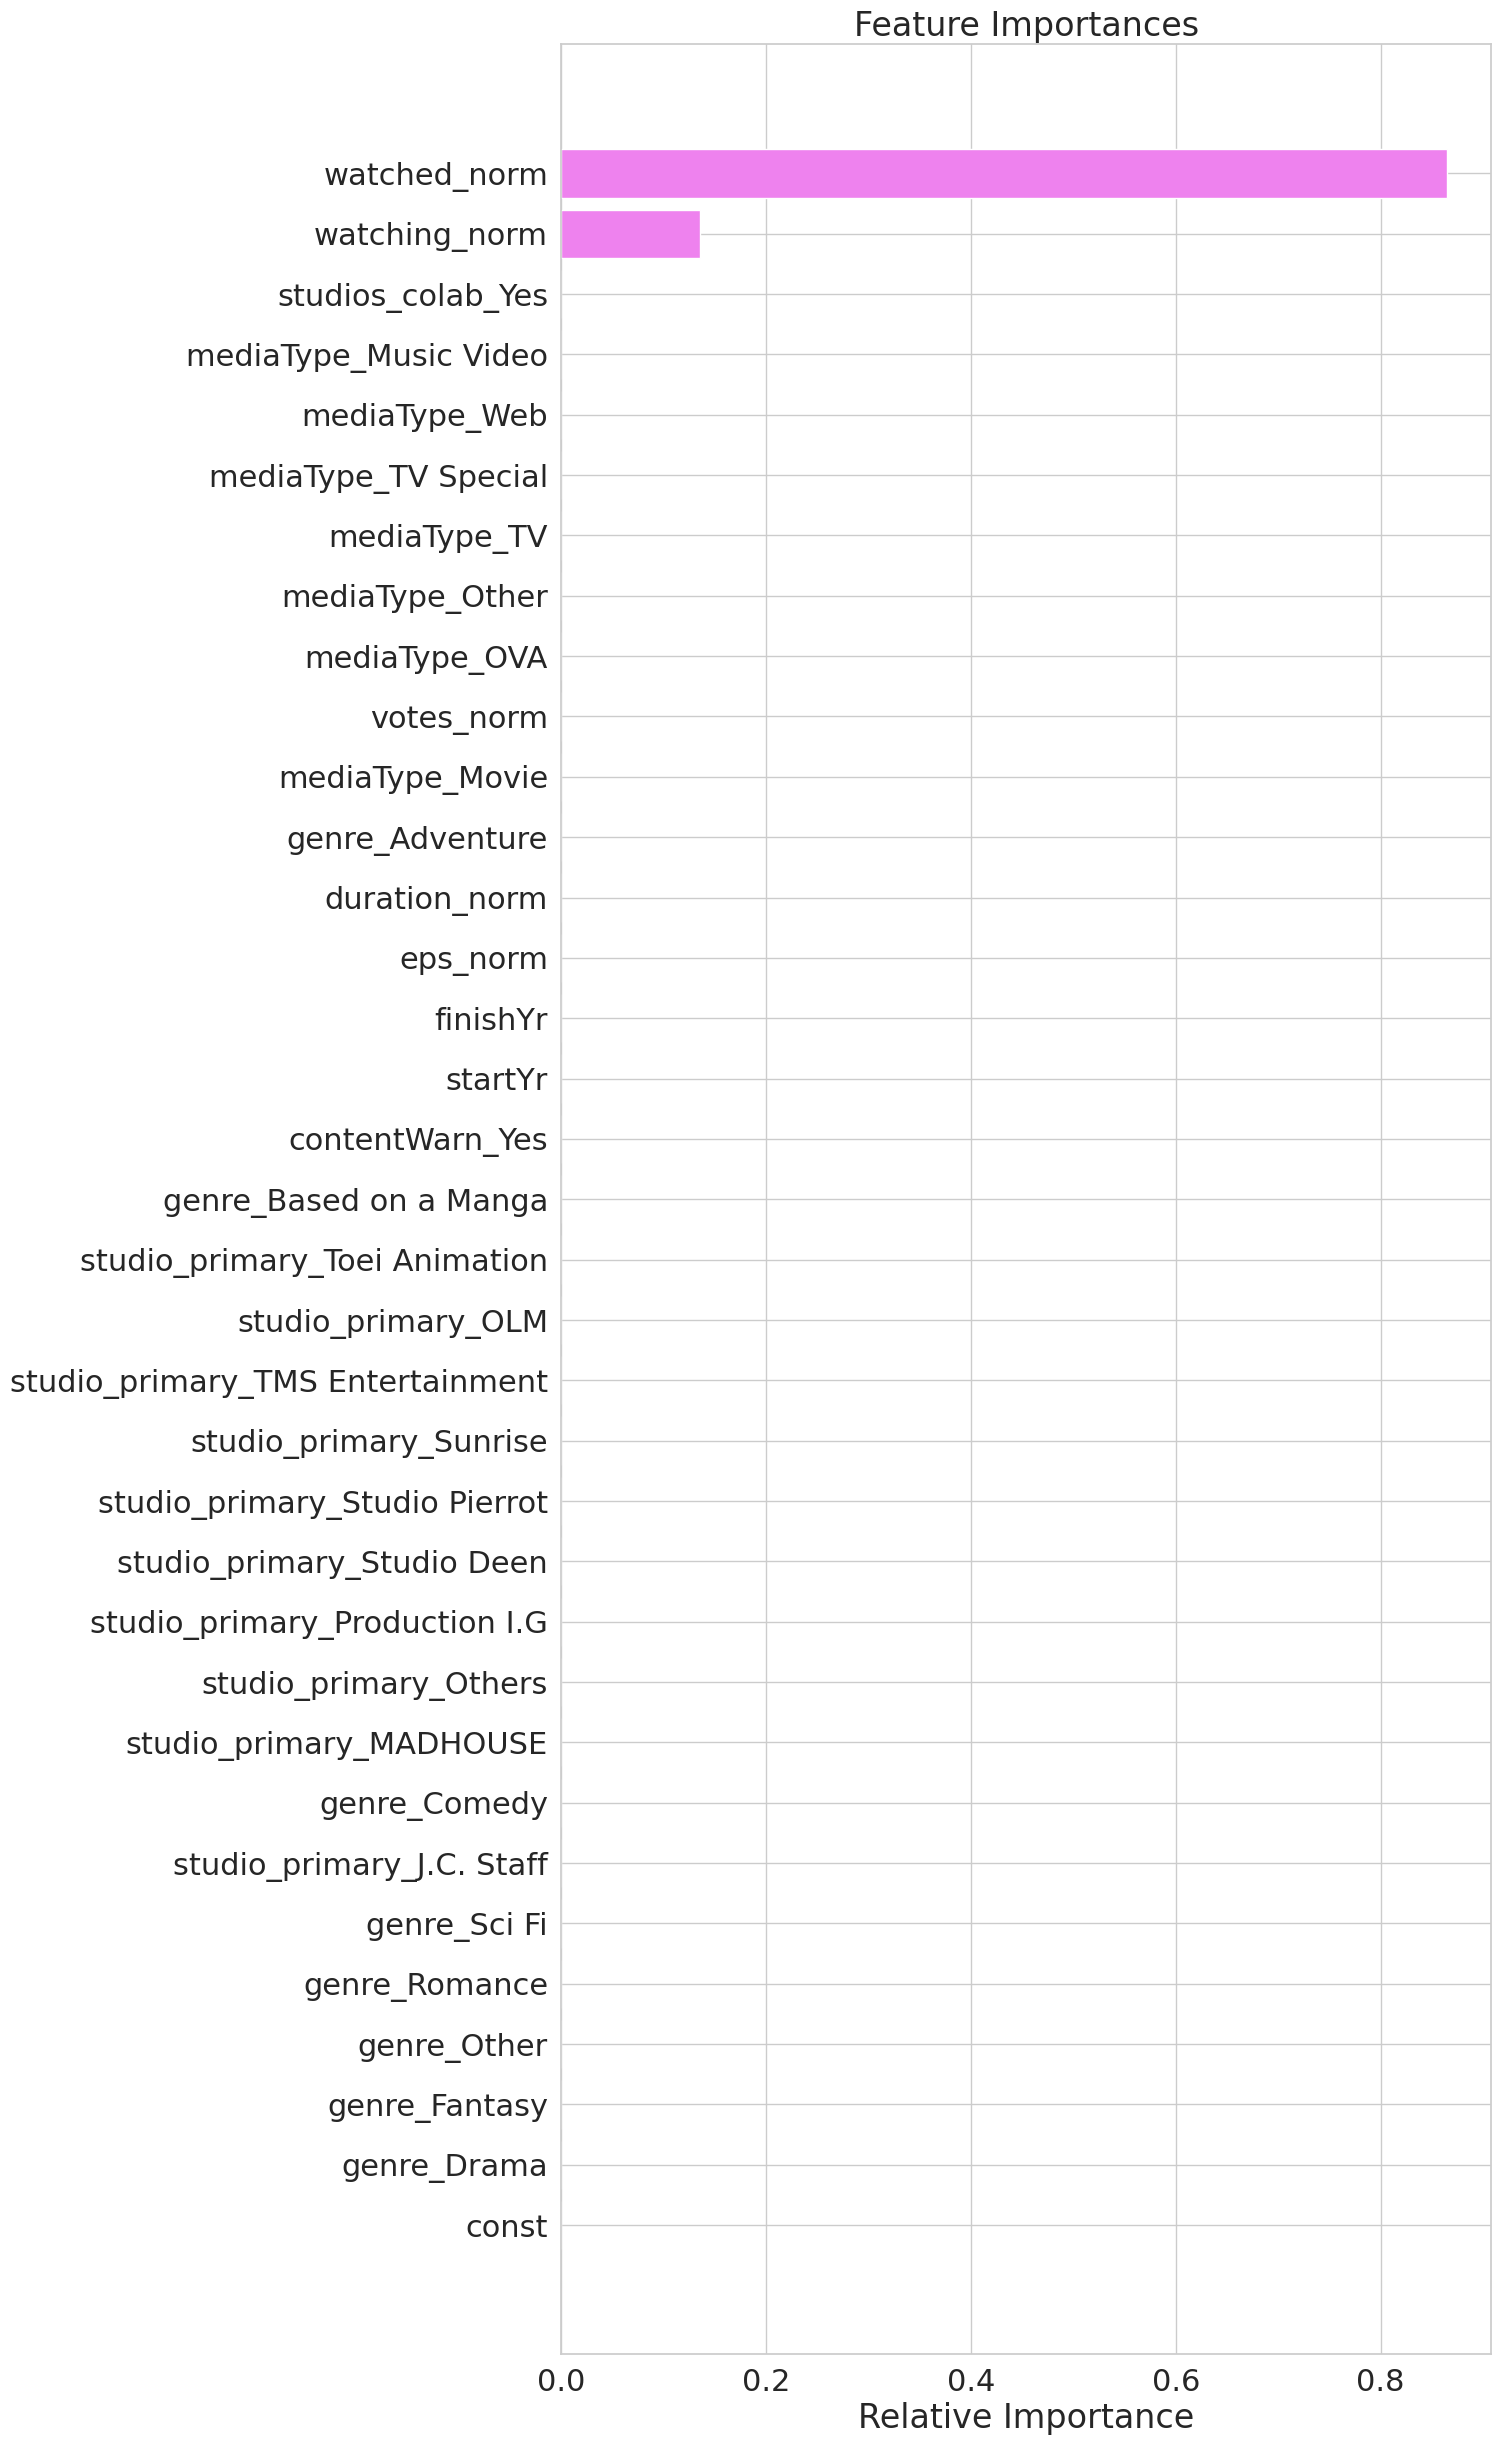

In [226]:
import numpy as np
importances=d_T_R.feature_importances_
feature_names=x.columns
indices=np.argsort(importances)
plt.figure(figsize=(12,30))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color='violet',align='center')
plt.yticks(range(len(indices)),[feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# CONCULSION
now this is our final model which follow all asumptions and this can be used for interpretations:--

* **Watched,watching and duration** are main factors contributing to the Anime rating
* **Votes and eps** are not affecting that much to the anime ratings
